# Project - Supervised Learning

### Submitted by:

### Kovendhan V       ( PGP-AIML-Online-Jun20B-Group4)

# Problem Statement & Data Description

**Data Description:**

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Domain:**
Banking

**Context:**
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.


**Attribute Information:**
- `ID` : Customer ID
- `Age` : Customer's age in completed years
- `Experience` : #years of professional experience
- `Income` : Annual income of the customer (USD 000)
- `ZIP Code` : Home Address ZIP code.
- `Family` : Family size of the customer
- `CCAvg` : Avg. spending on credit cards per month (USD 000)
- `Education` : Education Level.
    - Undergrad
    - Graduate
    - Advanced/Professional
- `Mortgage` : Value of house mortgage if any. (USD 000)
- `Personal Loan` : Did this customer accept the personal loan offered in the last campaign?
- `Securities Account` : Does the customer have a securities account with the bank?
- `CD Account` : Does the customer have a certificate of deposit (CD) account with the bank?
- `Online` : Does the customer use internet banking facilities?
- `Credit card` : Does the customer use a credit card issued by UniversalBank?

**Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal loans.

**Steps and tasks:**
1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings
(15 marks)
3. Get the target column distribution. Your comments (5 marks)
4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)
6. Print the confusion matrix for all the above models (5 marks)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 marks)

# Step 1 : Importing the necessary packages

In [1]:
#Numerical operations
import numpy as np
from scipy.stats import norm

#Data Exploration
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

#Data Preparation & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Model Building - Classifiers
import statsmodels.api as sm # Logit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Model Selection & Evaluation
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, log_loss, roc_curve,precision_recall_curve
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 2 : Exploratory Data Analysis

## Load the dataset

In [2]:
bankData = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")

In [3]:
#Visualising the top 5 records
bankData.head()

ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]

In [4]:
#Visualising the bottom 5 records
bankData.tail()

ID  Age  Experience  ...  CD Account  Online  CreditCard
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5 rows x 14 columns]

## Analyse the shape & features of the Dataset

In [5]:
print("No. of rows of the Data set : ", bankData.shape[0])
print("No. of columns of the Data set : ", bankData.shape[1])

No. of rows of the Data set :  5000
No. of columns of the Data set :  14


In [6]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
#Checking the Missing Values for all the features
bankData.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

#### Observations: 
1. There are totally 5000 records (rows) in the dataset, pertaining to 14 features (columns)
2. There are NO NULL values in the records.
3. All the features are of Numerical datatypes (though few of them are binary/ encoded).

In [8]:
#Re-ordering the target variable 'Personal Loan' as the last column for our convenience
temp = bankData['Personal Loan']
bankData.drop(['Personal Loan'], axis = 1, inplace=True)
bankData['Personal Loan'] = temp

bankData.head()

ID  Age  Experience  Income  ...  CD Account  Online  CreditCard  Personal Loan
0   1   25           1      49  ...           0       0           0              0
1   2   45          19      34  ...           0       0           0              0
2   3   39          15      11  ...           0       0           0              0
3   4   35           9     100  ...           0       0           0              0
4   5   35           8      45  ...           0       0           1              0

[5 rows x 14 columns]

## Statistical Summary

In [9]:
bankData.describe().T

count          mean  ...       75%      max
ID                  5000.0   2500.500000  ...   3750.25   5000.0
Age                 5000.0     45.338400  ...     55.00     67.0
Experience          5000.0     20.104600  ...     30.00     43.0
Income              5000.0     73.774200  ...     98.00    224.0
ZIP Code            5000.0  93152.503000  ...  94608.00  96651.0
Family              5000.0      2.396400  ...      3.00      4.0
CCAvg               5000.0      1.937938  ...      2.50     10.0
Education           5000.0      1.881000  ...      3.00      3.0
Mortgage            5000.0     56.498800  ...    101.00    635.0
Securities Account  5000.0      0.104400  ...      0.00      1.0
CD Account          5000.0      0.060400  ...      0.00      1.0
Online              5000.0      0.596800  ...      1.00      1.0
CreditCard          5000.0      0.294000  ...      1.00      1.0
Personal Loan       5000.0      0.096000  ...      0.00      1.0

[14 rows x 8 columns]

**Observations from Dataset Columns:**

**Input Variables**
- `ID` : 
    - Customer ID. Nominal variable which is used as the Primary Key for the entire Dataset. 
    - This columns is of no use to our Model Building. *To be dropped*. 
- `Age` : 
    - Customer's age in completed years. 
    - Numerical variable. Range of 23 years to 67 years with Mean and Median Age at ~45 years.
- `Experience` : 
    - Number of years of professional experience
    - Numerical variable. Range of -3 to 43 with Mean and Median experience at ~20 years.
    - Minimum value of -3 looks like an operational error made during data collection or documentation. Should treat for negative values. 
- `Income` : 
    - Annual income of the customer (USD 000)
    - Numerical variable. Range of USD 8000 to USD 224,000 with Mean at USD 73,000 and Median at USD 64,000. Seems like a long-tail with maximum value at USD 224,000. 
- `ZIP Code` : 
    - Home Address ZIP code.
    - Nominal variable. 
- `Family` : 
    - Family size of the customer
    - Ordinal variable with Range of 1 to 4 members. 
- `CCAvg` : 
    - Avg. spending on credit cards per month (USD 000)
    - Numerical variable with Range of USD 0 to USD 10,000 spending per month. Median of 2.50 and Maximum of 10.00 indicates presence of long-tail. 
- `Education` : 
    - Education Level.
    - Three categories are already numerically encoded in the dataset. 
    - Ordinal variable where we can assume Undergrad < Graduate < Advanced/Professional
        - Undergrad - Denoted by 1 in dataset
        - Graduate - Denoted by 2 in dataset
        - Advanced/Professional - Denoted by 3 in dataset
- `Mortgage` : 
    - Value of house mortgage if any. (USD 000)
    - Numerical variable with Range of 0 to 635. 
    - 0%, 25%, 50% quantile values of 0, 75% quantile value of 101 and Maximum value of 635 with a Standard Deviation of 101 indicates sparse distribution of data. To be checked by plotting the distribution.  
- `Securities Account` : 
    - Does the customer have a securities account with the bank?
    - Binary categorical variable encoded as 1 if yes, 0 if no. 
- `CD Account` : 
    - Does the customer have a Certificate of Deposit (CD) account with the bank?
    - Binary categorical variable encoded as 1 if yes, 0 if no. 
- `Online` : 
    - Does the customer use internet banking facilities?
    - Binary categorical variable encoded as 1 if yes, 0 if no. 
- `Credit card` : 
    - Does the customer use a credit card issued by UniversalBank?
    - Binary categorical variable encoded as 1 if yes, 0 if no. 

**Dependent/Target Variable**
- `Personal Loan` : 
    - Did this customer accept the personal loan offered in the last campaign?
------------------------------------------------------------------------------------------------------------------------------

### EDA - Univariate Analysis

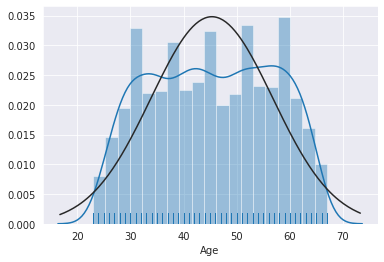

In [10]:
#Black Curve: Normal Distribution; Blue: Variable Distribution
sns.distplot(bankData["Age"], rug = True, fit=norm);

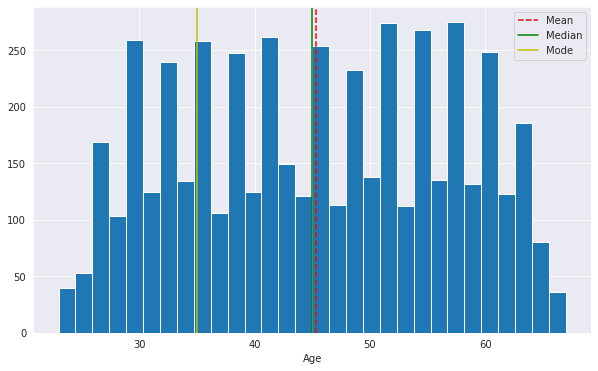

In [11]:
#Histogram with Mean, Median and Mode highlighted

plt.figure(figsize = (10,6))
plt.axvline(bankData["Age"].mean(), color='r', linestyle='--')
plt.axvline(bankData["Age"].median(), color='g', linestyle='-')
plt.axvline(bankData["Age"].mode()[0], color='y', linestyle='-')
plt.legend({'Mean':bankData["Age"].mean(),'Median':bankData["Age"].median(),'Mode':bankData["Age"].mode()[0]})
plt.xlabel("Age")
plt.hist(bankData["Age"], bins = 30)
plt.show()

In [12]:
print("Skewness of Age variable is : ", bankData["Age"].skew().round(2))

Skewness of Age variable is :  -0.03


Inter Quartile Range of Age variable :  20.0
Outliers beyond 1.5 x IQR for Age are :  []


Number of outliers for Age are :  0
Percentage of outliers for Age are :  0.0 %


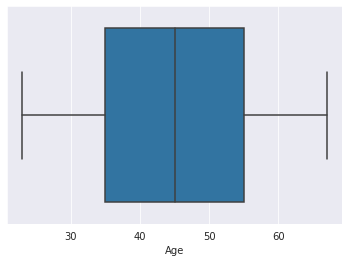

In [13]:
#Outliers check using Box Plot & IQR

sns.boxplot('Age', data = bankData);

Q1 = bankData["Age"].quantile(0.25)
Q3 = bankData["Age"].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range of Age variable : ", IQR)

age_outliers = np.where((bankData["Age"] < (Q1 - 1.5 * IQR)) | (bankData["Age"] > (Q3 + 1.5 * IQR)))
print("Outliers beyond 1.5 x IQR for Age are : ",age_outliers[0])
print("\n")
print("Number of outliers for Age are : ", len(age_outliers[0]))
print("Percentage of outliers for Age are : ", round((len(age_outliers[0]) / len(bankData["Age"]) * 100),2), "%")

**Observations on `Age`:**
- We can see that `Age` is Normally distributed with very minimal skewness. 
- There are no Outliers witnessed. 

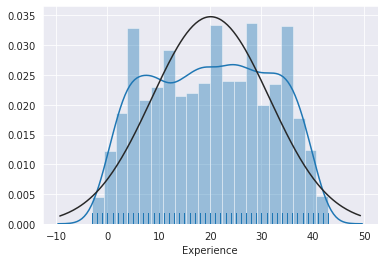

In [14]:
#Black Curve: Normal Distribution; Blue: Variable Distribution
sns.distplot(bankData["Experience"], rug = True, fit=norm);

In [15]:
bankData["Experience"].skew()

-0.026324688402384513

In [16]:
#Treating negative values in Experience column
print("Total Number of Negative values in Experience : ",bankData[bankData['Experience']<0]['Experience'].value_counts().sum())
print("Negative values in Experience and their frequency : \n",bankData[bankData['Experience']<0]['Experience'].value_counts())

Total Number of Negative values in Experience :  52
Negative values in Experience and their frequency : 
 -1    33
-2    15
-3     4
Name: Experience, dtype: int64


Imputing the negative values with Median (For `Experience`, Mean = Median, with minimal Skewness)

In [17]:
#Replacing the negative values with NaN
bankData['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
bankData['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
bankData['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

#Imputing the NaN values with Median
bankData['Experience'].fillna(bankData['Experience'].median(),inplace=True)

bankData.describe().T #Updated Five Number Summary

count          mean  ...       75%      max
ID                  5000.0   2500.500000  ...   3750.25   5000.0
Age                 5000.0     45.338400  ...     55.00     67.0
Experience          5000.0     20.327600  ...     30.00     43.0
Income              5000.0     73.774200  ...     98.00    224.0
ZIP Code            5000.0  93152.503000  ...  94608.00  96651.0
Family              5000.0      2.396400  ...      3.00      4.0
CCAvg               5000.0      1.937938  ...      2.50     10.0
Education           5000.0      1.881000  ...      3.00      3.0
Mortgage            5000.0     56.498800  ...    101.00    635.0
Securities Account  5000.0      0.104400  ...      0.00      1.0
CD Account          5000.0      0.060400  ...      0.00      1.0
Online              5000.0      0.596800  ...      1.00      1.0
CreditCard          5000.0      0.294000  ...      1.00      1.0
Personal Loan       5000.0      0.096000  ...      0.00      1.0

[14 rows x 8 columns]

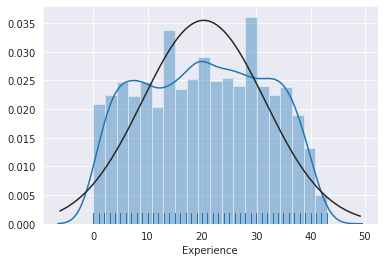

In [18]:
#Rechecking the distribution post Imputation
sns.distplot(bankData["Experience"], rug = True, fit=norm);

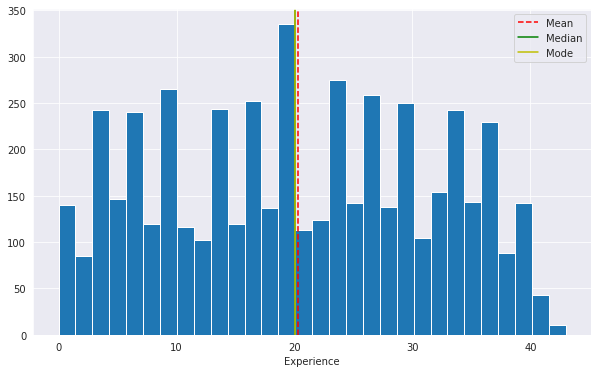

In [19]:
#Histogram with Mean, Median and Mode highlighted

plt.figure(figsize = (10,6))
plt.axvline(bankData["Experience"].mean(), color='r', linestyle='--')
plt.axvline(bankData["Experience"].median(), color='g', linestyle='-')
plt.axvline(bankData["Experience"].mode()[0], color='y', linestyle='-')
plt.legend({'Mean':bankData["Experience"].mean(),'Median':bankData["Experience"].median(),'Mode':bankData["Experience"].mode()[0]})
plt.xlabel("Experience")
plt.hist(bankData["Experience"], bins = 30)
plt.show()

In [20]:
bankData["Experience"].skew()

-0.01409975101962344

Inter Quartile Range of Experience variable :  19.0
Outliers beyond 1.5 x IQR for Experience are :  []


Number of outliers for Experience are :  0
Percentage of outliers for Experience are :  0.0 %


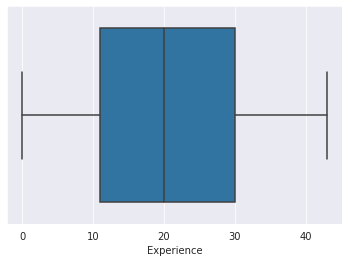

In [21]:
#Outliers check using Box Plot & IQR

sns.boxplot('Experience', data = bankData);

Q1 = bankData["Experience"].quantile(0.25)
Q3 = bankData["Experience"].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range of Experience variable : ", IQR)

exp_outliers = np.where((bankData["Experience"] < (Q1 - 1.5 * IQR)) | (bankData["Experience"] > (Q3 + 1.5 * IQR)))
print("Outliers beyond 1.5 x IQR for Experience are : ",exp_outliers[0])
print("\n")
print("Number of outliers for Experience are : ", len(exp_outliers[0]))
print("Percentage of outliers for Experience are : ", round((len(exp_outliers[0]) / len(bankData["Experience"]) * 100),2), "%")

**Observations on `Experience`:**
- We can see that `Experience` is Normally distributed with very minimal skewness. 
- There are no Outliers witnessed. 
- Distribution remained the same post Negative values imputation. 

#### Income

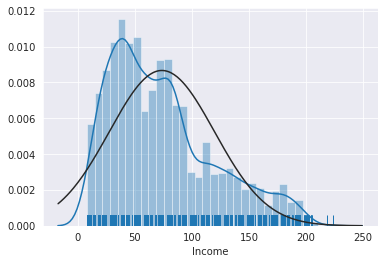

In [22]:
#Black Curve: Normal Distribution; Blue: Variable Distribution
sns.distplot(bankData["Income"], rug = True, fit=norm);

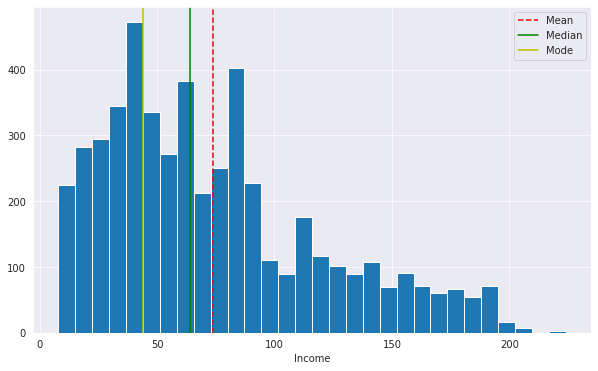

In [23]:
#Histogram with Mean, Median and Mode highlighted

plt.figure(figsize = (10,6))
plt.axvline(bankData["Income"].mean(), color='r', linestyle='--')
plt.axvline(bankData["Income"].median(), color='g', linestyle='-')
plt.axvline(bankData["Income"].mode()[0], color='y', linestyle='-')
plt.legend({'Mean':bankData["Income"].mean(),'Median':bankData["Income"].median(),'Mode':bankData["Income"].mode()[0]})
plt.xlabel("Income")
plt.hist(bankData["Income"], bins = 30)
plt.show()

In [24]:
bankData["Income"].skew()

0.8413386072610816

Inter Quartile Range of Income variable :  59.0
Outliers beyond 1.5 x IQR for Income are :  [  18   47   53   59  303  329  459  526  677  740  779  782  787  914
  917  940 1014 1067 1084 1097 1130 1167 1204 1277 1307 1320 1395 1432
 1504 1551 1552 1592 1637 1666 1704 1711 1716 1719 1783 1785 1824 1901
 1912 1935 2087 2101 2196 2215 2246 2278 2319 2337 2447 2646 2704 2753
 2841 2859 2904 2934 2956 2988 3124 3312 3351 3458 3483 3543 3568 3608
 3639 3758 3804 3821 3896 3943 4009 4020 4042 4122 4156 4225 4267 4282
 4292 4309 4484 4563 4574 4606 4655 4659 4670 4895 4981 4993]


Number of outliers for Income are :  96
Percentage of outliers for Income are :  1.92 %


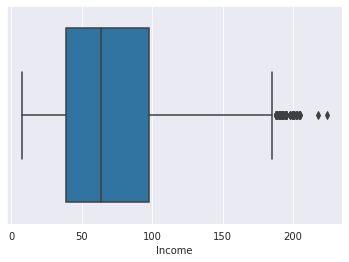

In [25]:
#Outliers check using Box Plot & IQR

sns.boxplot('Income', data = bankData);

Q1 = bankData["Income"].quantile(0.25)
Q3 = bankData["Income"].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range of Income variable : ", IQR)

inc_outliers = np.where((bankData["Income"] < (Q1 - 1.5 * IQR)) | (bankData["Income"] > (Q3 + 1.5 * IQR)))
print("Outliers beyond 1.5 x IQR for Income are : ",inc_outliers[0])
print("\n")
print("Number of outliers for Income are : ", len(inc_outliers[0]))
print("Percentage of outliers for Income are : ", round((len(inc_outliers[0]) / len(bankData["Income"]) * 100),2), "%")

In [26]:
#Treating the Skewness with Log transformation
bankData['Income'] = np.log(bankData['Income'])

Skewness post Log transformation :  -0.46050403395988815


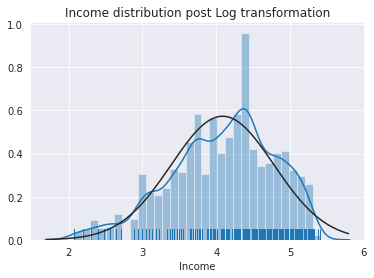

In [27]:
print("Skewness post Log transformation : ",bankData["Income"].skew())
sns.distplot(bankData["Income"], rug = True, fit=norm)
plt.title("Income distribution post Log transformation")
plt.show()

Inter Quartile Range of Income variable :  0.921405832540926
Outliers beyond 1.5 x IQR for Income are :  [  50  110  197  291  391  801  933  939 1000 1054 1135 1197 1472 1482
 1720 1770 1771 1817 2028 2123 2188 2218 2248 2264 2298 2347 2354 2509
 2546 2591 2598 2695 2905 3254 3410 3526 3606 3718 4044 4094 4212 4223
 4416 4421 4507 4511 4657 4706 4784]


Number of outliers for Income (post log transform) :  49
Percentage of outliers for Income (post log transform) :  0.98 %


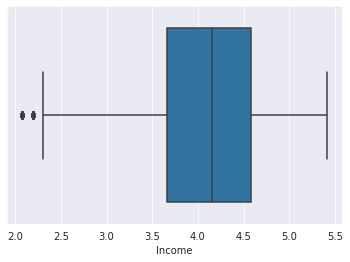

In [28]:
#Outliers check using Box Plot & IQR

sns.boxplot('Income', data = bankData);

Q1 = bankData["Income"].quantile(0.25)
Q3 = bankData["Income"].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range of Income variable : ", IQR)

inc_outliers = np.where((bankData["Income"] < (Q1 - 1.5 * IQR)) | (bankData["Income"] > (Q3 + 1.5 * IQR)))
print("Outliers beyond 1.5 x IQR for Income are : ",inc_outliers[0])
print("\n")
print("Number of outliers for Income (post log transform) : ", len(inc_outliers[0]))
print("Percentage of outliers for Income (post log transform) : ", round((len(inc_outliers[0]) / len(bankData["Income"]) * 100),2), "%")

**Observations on `Income`:**
- We can see that `Income` is positively skewed in distribution with long-tail.  
- Around 2% of the total records fall beyond the 1.5 x IQR range (Outliers).
- We have treated the skewness of `Income` using Log transformation and reduced the outliers from 2% to 1%. 

#### CCAvg

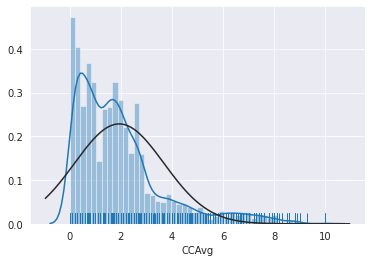

In [29]:
#Black Curve: Normal Distribution; Blue: Variable Distribution
sns.distplot(bankData["CCAvg"], rug = True, fit=norm);

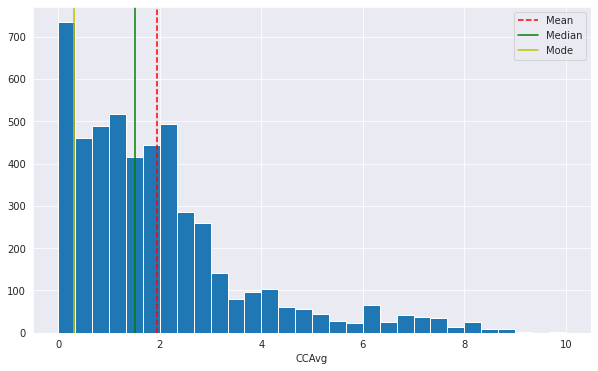

In [30]:
#Histogram with Mean, Median and Mode highlighted

plt.figure(figsize = (10,6))
plt.axvline(bankData["CCAvg"].mean(), color='r', linestyle='--')
plt.axvline(bankData["CCAvg"].median(), color='g', linestyle='-')
plt.axvline(bankData["CCAvg"].mode()[0], color='y', linestyle='-')
plt.legend({'Mean':bankData["CCAvg"].mean(),'Median':bankData["CCAvg"].median(),'Mode':bankData["CCAvg"].mode()[0]})
plt.xlabel("CCAvg")
plt.hist(bankData["CCAvg"], bins = 30)
plt.show()

In [31]:
bankData["CCAvg"].skew()

1.5984433366678663

Inter Quartile Range of CCAvg variable :  1.8
Outliers beyond 1.5 x IQR for CCAvg are :  [   9   18   44   55   61   90  131  145  150  151  160  172  174  194
  213  227  243  251  299  301  302  311  324  329  348  351  361  365
  389  400  422  423  432  462  463  474  475  479  494  509  526  544
  554  570  577  589  597  614  615  636  641  681  703  704  725  730
  740  770  779  782  783  784  785  787  800  805  807  834  881  891
  909  915  917  935  952 1008 1023 1038 1050 1064 1079 1084 1116 1125
 1149 1163 1190 1192 1220 1237 1244 1273 1277 1304 1307 1321 1328 1339
 1349 1354 1408 1411 1431 1432 1447 1495 1498 1520 1521 1541 1592 1600
 1603 1626 1629 1637 1651 1652 1695 1696 1704 1711 1716 1719 1752 1765
 1768 1792 1797 1824 1825 1830 1843 1868 1884 1890 1901 1918 1962 1994
 2005 2014 2038 2041 2046 2059 2076 2077 2087 2101 2103 2109 2144 2149
 2191 2226 2231 2235 2302 2305 2316 2317 2337 2338 2359 2377 2379 2382
 2394 2400 2410 2447 2455 2468 2478 2490 2498 2502 2522 252

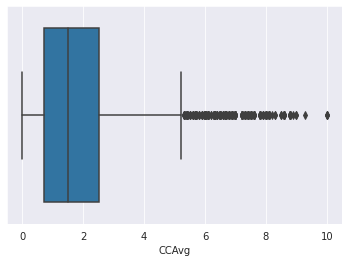

In [32]:
#Outliers check using Box Plot & IQR

sns.boxplot('CCAvg', data = bankData);

Q1 = bankData["CCAvg"].quantile(0.25)
Q3 = bankData["CCAvg"].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range of CCAvg variable : ", IQR)

ccavg_outliers = np.where((bankData["CCAvg"] < (Q1 - 1.5 * IQR)) | (bankData["CCAvg"] > (Q3 + 1.5 * IQR)))
print("Outliers beyond 1.5 x IQR for CCAvg are : ",ccavg_outliers[0])
print("\n")
print("Number of outliers for CCAvg are : ", len(ccavg_outliers[0]))
print("Percentage of outliers for CCAvg are : ", round((len(ccavg_outliers[0]) / len(bankData["CCAvg"]) * 100),2), "%")

Here `CCAvg` variable has zero values and hence applying Log transformation will result in error. 
Therefore, we will be doing log(x+1) transformation to mitigate divided by zero error. 

In [33]:
#Treating the Skewness with Log transformation
bankData['CCAvg'] = bankData['CCAvg'].apply(lambda x : x+1)

In [34]:
bankData['CCAvg'] = np.log(bankData['CCAvg'])

Skewness post Log transformation :  0.31922379644464305


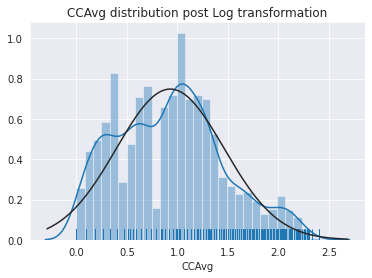

In [35]:
print("Skewness post Log transformation : ",bankData["CCAvg"].skew())
sns.distplot(bankData["CCAvg"], rug = True, fit=norm)
plt.title("CCAvg distribution post Log transformation")
plt.show()

Inter Quartile Range of CCAvg variable :  0.7221347174331977
Outliers beyond 1.5 x IQR for CCAvg are :  [ 787 2101 2337]


Number of outliers for CCAvg (post log(x+1) transform) :  3
Percentage of outliers for CCAvg (post log(x+1) transform) :  0.06 %


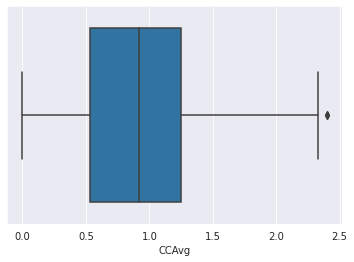

In [36]:
#Outliers check using Box Plot & IQR

sns.boxplot('CCAvg', data = bankData);

Q1 = bankData["CCAvg"].quantile(0.25)
Q3 = bankData["CCAvg"].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range of CCAvg variable : ", IQR)

ccavg_outliers = np.where((bankData["CCAvg"] < (Q1 - 1.5 * IQR)) | (bankData["CCAvg"] > (Q3 + 1.5 * IQR)))
print("Outliers beyond 1.5 x IQR for CCAvg are : ",ccavg_outliers[0])
print("\n")
print("Number of outliers for CCAvg (post log(x+1) transform) : ", len(ccavg_outliers[0]))
print("Percentage of outliers for CCAvg (post log(x+1) transform) : ", round((len(ccavg_outliers[0]) / len(bankData["CCAvg"]) * 100),2), "%")

**Observations on `CCAvg`:**
- We can see that `CCAvg` is positively skewed in distribution with long-tail.  
- Around 6.5% of the total records fall beyond the 1.5 x IQR range (Outliers).
- We have treated the skewness of `CCAvg` using Log(x+1) transformation and reduced 
    - Skewness from 1.6 to 0.32.
    - Percentage of outliers from 6.5% to 0.06%. 

#### Mortgage

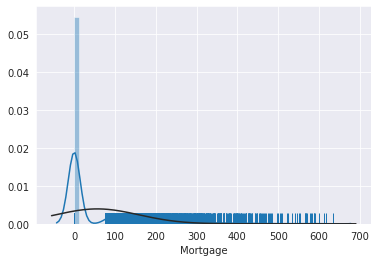

In [37]:
#Black Curve: Normal Distribution; Blue: Variable Distribution
sns.distplot(bankData["Mortgage"], rug = True, fit=norm);

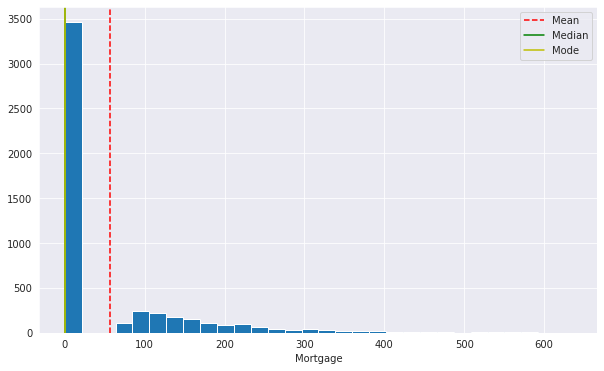

In [38]:
#Histogram with Mean, Median and Mode highlighted

plt.figure(figsize = (10,6))
plt.axvline(bankData["Mortgage"].mean(), color='r', linestyle='--')
plt.axvline(bankData["Mortgage"].median(), color='g', linestyle='-')
plt.axvline(bankData["Mortgage"].mode()[0], color='y', linestyle='-')
plt.legend({'Mean':bankData["Mortgage"].mean(),'Median':bankData["Mortgage"].median(),'Mode':bankData["Mortgage"].mode()[0]})
plt.xlabel("Mortgage")
plt.hist(bankData["Mortgage"], bins = 30)
plt.show()

In [39]:
bankData["Mortgage"].skew()

2.1040023191079444

Inter Quartile Range of Mortgage variable :  101.0
Outliers beyond 1.5 x IQR for Mortgage are :  [  22   39   42   59   66  112  119  130  187  209  242  248  251  288
  303  327  335  338  354  362  365  405  459  473  479  486  526  528
  540  570  584  587  610  640  645  671  679  684  751  764  782  805
  816  840  863  883  888  891  895  909  915  935  948  952  973  998
 1007 1010 1014 1023 1050 1077 1111 1162 1164 1167 1232 1273 1277 1280
 1288 1294 1301 1303 1304 1328 1339 1354 1359 1372 1395 1407 1424 1466
 1475 1513 1522 1558 1582 1583 1599 1623 1665 1674 1688 1716 1732 1736
 1780 1783 1789 1827 1835 1842 1866 1871 1875 1882 1889 1906 1937 1954
 1970 2002 2009 2027 2034 2041 2074 2076 2087 2090 2098 2159 2190 2203
 2217 2232 2246 2291 2317 2319 2323 2341 2342 2345 2382 2394 2397 2422
 2428 2434 2443 2469 2486 2498 2500 2512 2538 2541 2590 2593 2653 2664
 2668 2687 2714 2749 2753 2768 2769 2773 2776 2812 2817 2820 2841 2856
 2859 2867 2885 2921 2934 2941 2942 2946 2947 2956 

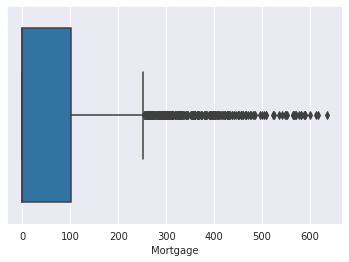

In [40]:
#Outliers check using Box Plot & IQR

sns.boxplot('Mortgage', data = bankData);

Q1 = bankData["Mortgage"].quantile(0.25)
Q3 = bankData["Mortgage"].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range of Mortgage variable : ", IQR)

mrtg_outliers = np.where((bankData["Mortgage"] < (Q1 - 1.5 * IQR)) | (bankData["Mortgage"] > (Q3 + 1.5 * IQR)))
print("Outliers beyond 1.5 x IQR for Mortgage are : ",mrtg_outliers[0])
print("\n")
print("Number of outliers for Mortgage are : ", len(mrtg_outliers[0]))
print("Percentage of outliers for Mortgage are : ", round((len(mrtg_outliers[0]) / len(bankData["Mortgage"]) * 100),2), "%")

Here Mortgage variable has zero values and hence applying Log transformation will result in error. Therefore, we will be doing log(x+1) transformation to mitigate divided by zero error.


Skewness post Log transformation :  0.8766882783607729


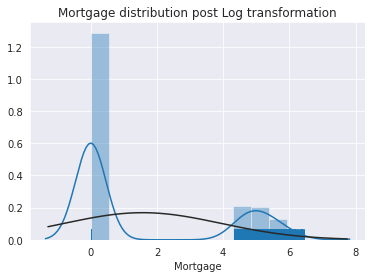

In [41]:
#Treating the Skewness with Log transformation
bankData['Mortgage'] = bankData['Mortgage'].apply(lambda x : x+1)
bankData['Mortgage'] = np.log(bankData['Mortgage'])

print("Skewness post Log transformation : ",bankData["Mortgage"].skew())
sns.distplot(bankData["Mortgage"], rug = True, fit=norm)
plt.title("Mortgage distribution post Log transformation")
plt.show()

Inter Quartile Range of Mortgage variable :  4.624972813284271
Outliers beyond 1.5 x IQR for Mortgage are :  []


Number of outliers for Mortgage (post log(x+1) transform) :  0
Percentage of outliers for Mortgage (post log(x+1) transform) :  0.0 %


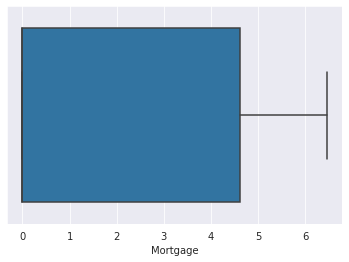

In [42]:
#Outliers check using Box Plot & IQR

sns.boxplot('Mortgage', data = bankData);

Q1 = bankData["Mortgage"].quantile(0.25)
Q3 = bankData["Mortgage"].quantile(0.75)
IQR = Q3 - Q1
print("Inter Quartile Range of Mortgage variable : ", IQR)

mrtg_outliers = np.where((bankData["Mortgage"] < (Q1 - 1.5 * IQR)) | (bankData["Mortgage"] > (Q3 + 1.5 * IQR)))
print("Outliers beyond 1.5 x IQR for Mortgage are : ",mrtg_outliers[0])
print("\n")
print("Number of outliers for Mortgage (post log(x+1) transform) : ", len(mrtg_outliers[0]))
print("Percentage of outliers for Mortgage (post log(x+1) transform) : ", round((len(mrtg_outliers[0]) / len(bankData["Mortgage"]) * 100),2), "%")

**Observations on `Mortgage`:**
- We can see that `Mortgage` is positively skewed in distribution with long-tail.  
- Around 6% of the total records fall beyond the 1.5 x IQR range (Outliers).
- We have treated the skewness of `Mortgage` using Log(x+1) transformation and reduced 
    - Skewness from 2.1 to 0.87.
    - Percentage of outliers from 6% to 0%. 

#### Family

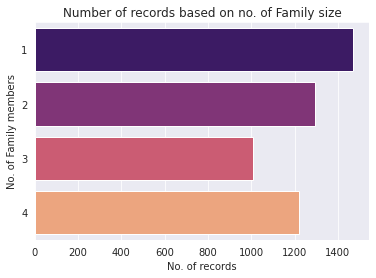

In [43]:
sns.countplot(y = "Family", data = bankData, palette = "magma")
plt.ylabel("No. of Family members")
plt.xlabel("No. of records")
plt.title("Number of records based on no. of Family size")
plt.show()

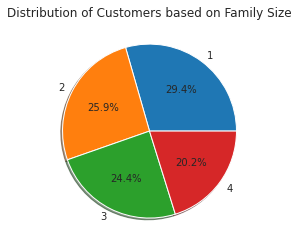

In [44]:
#Pie Chart
labels = ['1', '2', '3', '4']
plt.pie(bankData['Family'].value_counts(), labels = labels, autopct='%1.1f%%', shadow=True)
plt.title("Distribution of Customers based on Family Size")
plt.show()

**Observations on `Family`:**
- Around 29% of the customers are having a Family Size of 1, meaning they are single customers. 
- Both family size of 2 and 3 having equal distribution of 26% and 24% respectively. 

#### Education

1    2096
3    1501
2    1403
Name: Education, dtype: int64


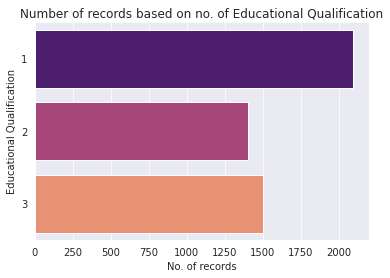

In [45]:
print(bankData['Education'].value_counts())
sns.countplot(y = "Education", data = bankData, palette = "magma")
plt.ylabel("Educational Qualification")
plt.xlabel("No. of records")
plt.title("Number of records based on no. of Educational Qualification")
plt.show()

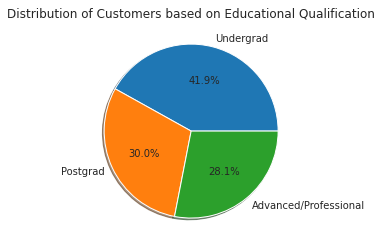

In [46]:
#Pie Chart
labels = ['Undergrad', 'Postgrad', 'Advanced/Professional']
plt.pie(bankData['Education'].value_counts(), labels = labels, autopct='%1.1f%%', shadow=True)
plt.title("Distribution of Customers based on Educational Qualification")
plt.show()

**Observations on `Education`:**
- Around 42% of the Customers are having Undergrad degree. 
- Postgrad and Professionals have almost equal representation with 30% and 28% respectively.

#### Securities Account

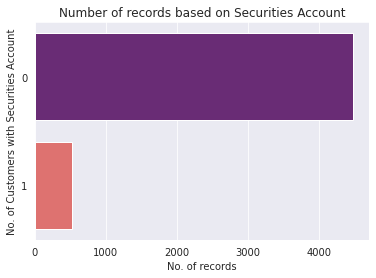

In [47]:
sns.countplot(y = "Securities Account", data = bankData, palette = "magma")
plt.ylabel("No. of Customers with Securities Account")
plt.xlabel("No. of records")
plt.title("Number of records based on Securities Account")
plt.show()

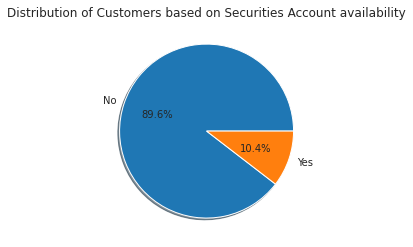

In [48]:
#Pie Chart
labels = ['No', 'Yes']
plt.pie(bankData['Securities Account'].value_counts(), labels = labels, autopct='%1.1f%%', shadow=True)
plt.title("Distribution of Customers based on Securities Account availability")
plt.show()

**Observations on `Securities Account`:**
- Only 1/10th of the Customers have opted for Securities Account.

#### CD Account

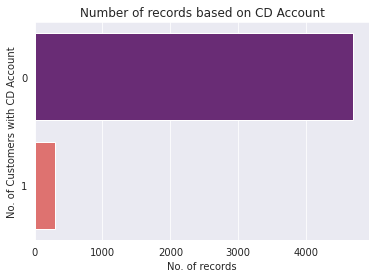

In [49]:
sns.countplot(y = "CD Account", data = bankData, palette = "magma")
plt.ylabel("No. of Customers with CD Account")
plt.xlabel("No. of records")
plt.title("Number of records based on CD Account")
plt.show()

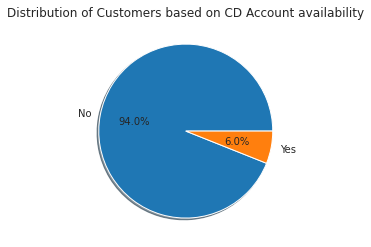

In [50]:
#Pie Chart
labels = ['No', 'Yes']
plt.pie(bankData['CD Account'].value_counts(), labels = labels, autopct='%1.1f%%', shadow=True)
plt.title("Distribution of Customers based on CD Account availability")
plt.show()

**Observations on `CD Account`:**
- Only 6% of the Customers have opted for Certificate of Deposit Account.

#### Online

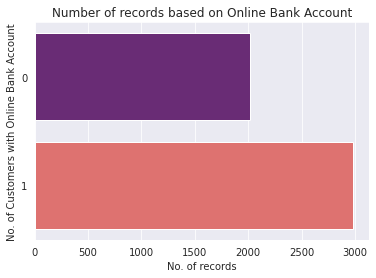

In [51]:
sns.countplot(y = "Online", data = bankData, palette = "magma")
plt.ylabel("No. of Customers with Online Bank Account")
plt.xlabel("No. of records")
plt.title("Number of records based on Online Bank Account")
plt.show()

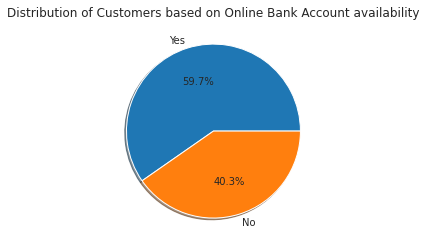

In [52]:
#Pie Chart
labels = ['Yes', 'No']
plt.pie(bankData['Online'].value_counts(), labels = labels, autopct='%1.1f%%', shadow=True)
plt.title("Distribution of Customers based on Online Bank Account availability")
plt.show()

**Observations on `Online`:**
- 3/5th of the Customers have Online Banking Account whereas the remaining 2/5th doesn't.

#### Credit Card

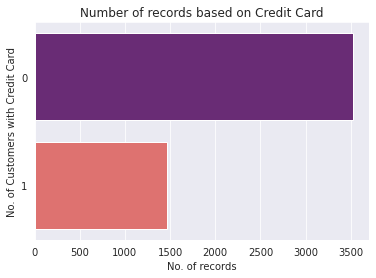

In [53]:
sns.countplot(y = "CreditCard", data = bankData, palette = "magma")
plt.ylabel("No. of Customers with Credit Card")
plt.xlabel("No. of records")
plt.title("Number of records based on Credit Card")
plt.show()

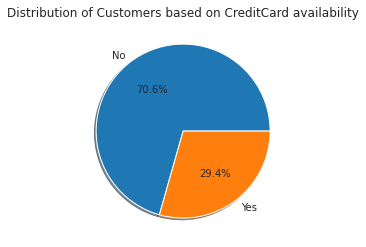

In [54]:
#Pie Chart
labels = ['No', 'Yes']
plt.pie(bankData['CreditCard'].value_counts(), labels = labels, autopct='%1.1f%%', shadow=True)
plt.title("Distribution of Customers based on CreditCard availability")
plt.show()

**Observations on `CreditCard`:**
- Only 30% of the total Customers have Credit Card accounts.

### Data Distribution of Target variable `Personal Loan`

In [55]:
print("No of customers opted for Personal Loan is : ", bankData['Personal Loan'].value_counts()[1])
print("No of customers not opted for Personal Loan is : ", bankData['Personal Loan'].value_counts()[0])

No of customers opted for Personal Loan is :  480
No of customers not opted for Personal Loan is :  4520


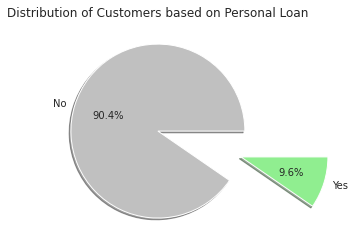

In [56]:
colors = ["silver", "lightgreen"]
labels = ['No', 'Yes']
plt.pie(bankData['Personal Loan'].value_counts(), labels = labels, colors = colors, explode = (0,1), autopct='%1.1f%%', shadow=True)
plt.title("Distribution of Customers based on Personal Loan")
plt.show()

Let us check the variables grouped by `Personal Loan`

In [57]:
bankData.groupby(bankData['Personal Loan']).mean()

ID        Age  ...  CreditCard  Personal Loan
Personal Loan                          ...                           
0              2512.165487  45.367257  ...    0.293584            0.0
1              2390.650000  45.066667  ...    0.297917            1.0

[2 rows x 14 columns]

**Observations from Target variable distribution:**
1. Dataset has **"Class Imbalance" with only 9.6% of the Customers have opted for Personal Loan.**
2. Should look for Resampling of minority (or majority) classes during Data Preprocessing step, prior to Model Building.
3. 'Accuracy Score' is not a good metric for datasets with Class Imbalance. 
4. During Model Evaluation, we need to check Metrics such as **'Precision' and 'Recall'** to understand the Classifier. 
5. `Income` of Customers who opted for `Personal Loan` is USD 144,000 whereas for non-opting Customers it is USD 66,000.
6. `CCAvg` for Customers who opted for `Personal Loan` varies from those who hasn't.
7. `Education` qualification of Customers who opted for `Personal Loan`is higher than those who hasn't.
8. `Mortgage` values of Customers who opted for `Personal Loan` is twice as that of those who hasn't. 
9. Customers who opted for `Personal Loan` have also opted for `CD Account` (Certificate of Deposit). 
10. **Therefore, `Income`, `Education`, `CCAvg`, `Mortgage` and `CD Account` seems like some of the important variables that needs to be included in the Model.**

### EDA - Multivariate Analysis

Scatter Plot between all pairs of variables



<Figure size 1152x1152 with 0 Axes>

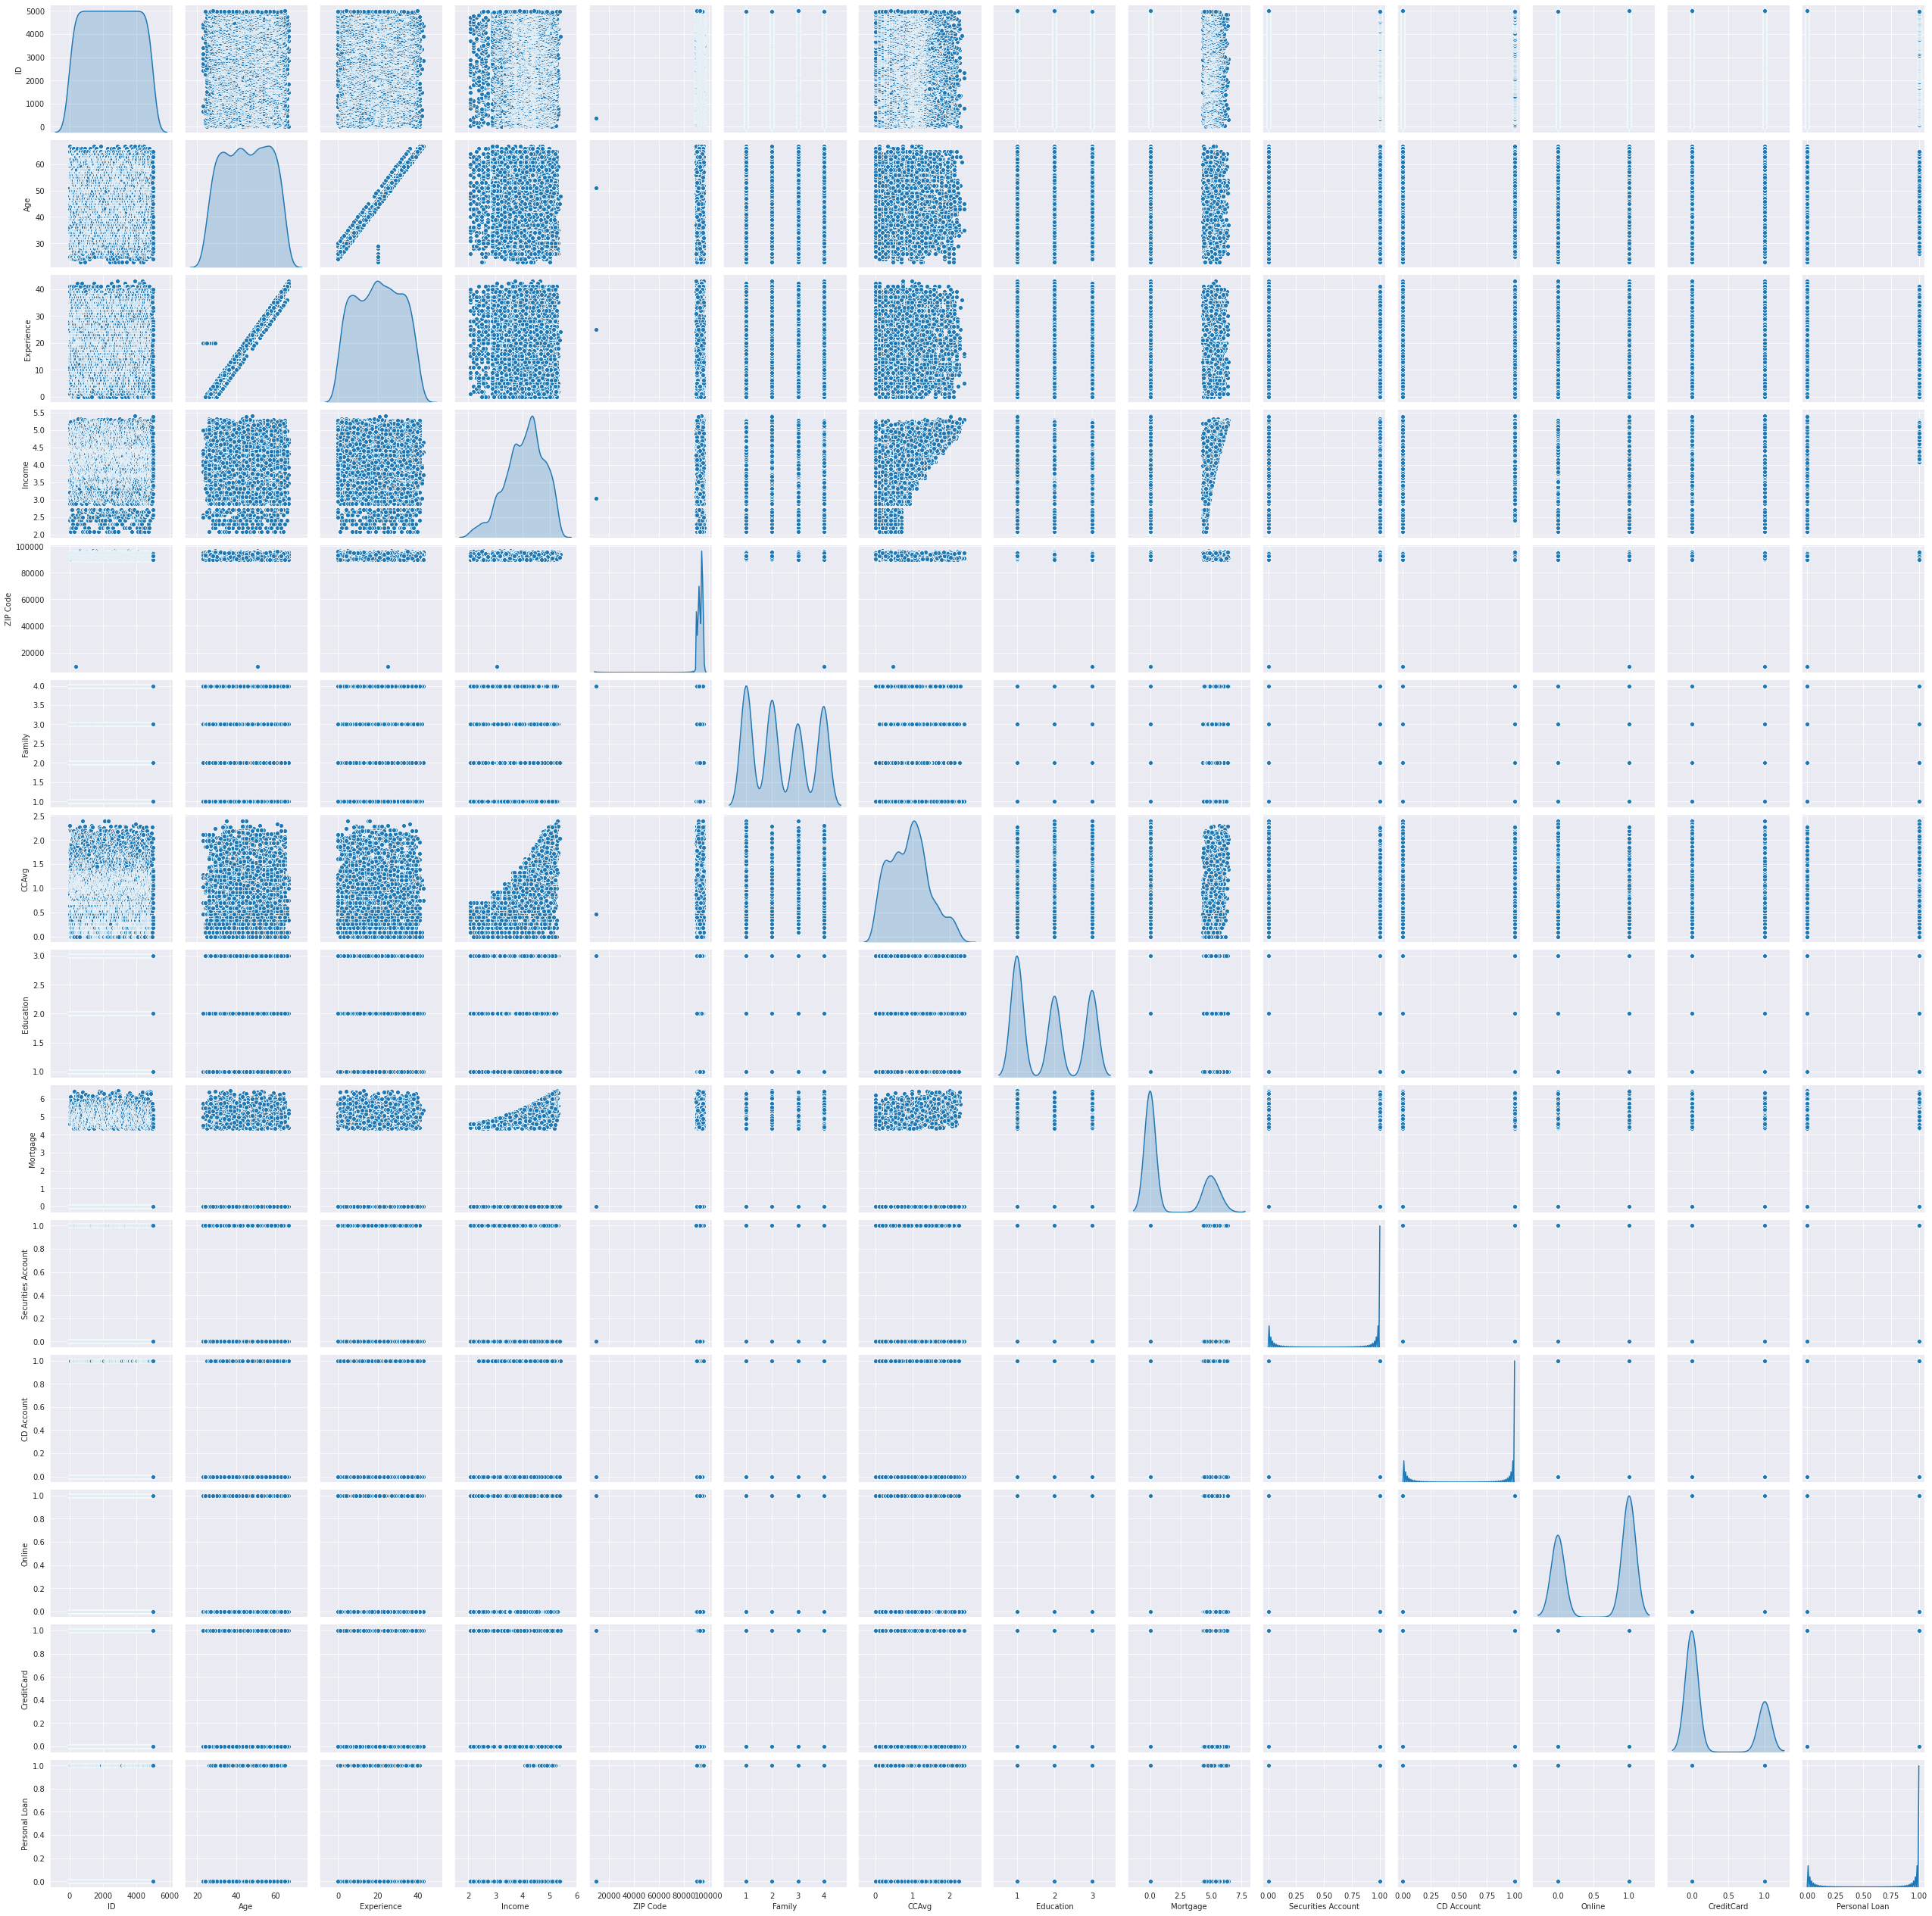

In [58]:
plt.figure(figsize = (16,16))
sns.pairplot(data=bankData, diag_kind='kde')
print("Scatter Plot between all pairs of variables\n")
plt.show()

Scatter Plot between all pairs of variables based on Personal Loan subscription


<Figure size 1152x1152 with 0 Axes>

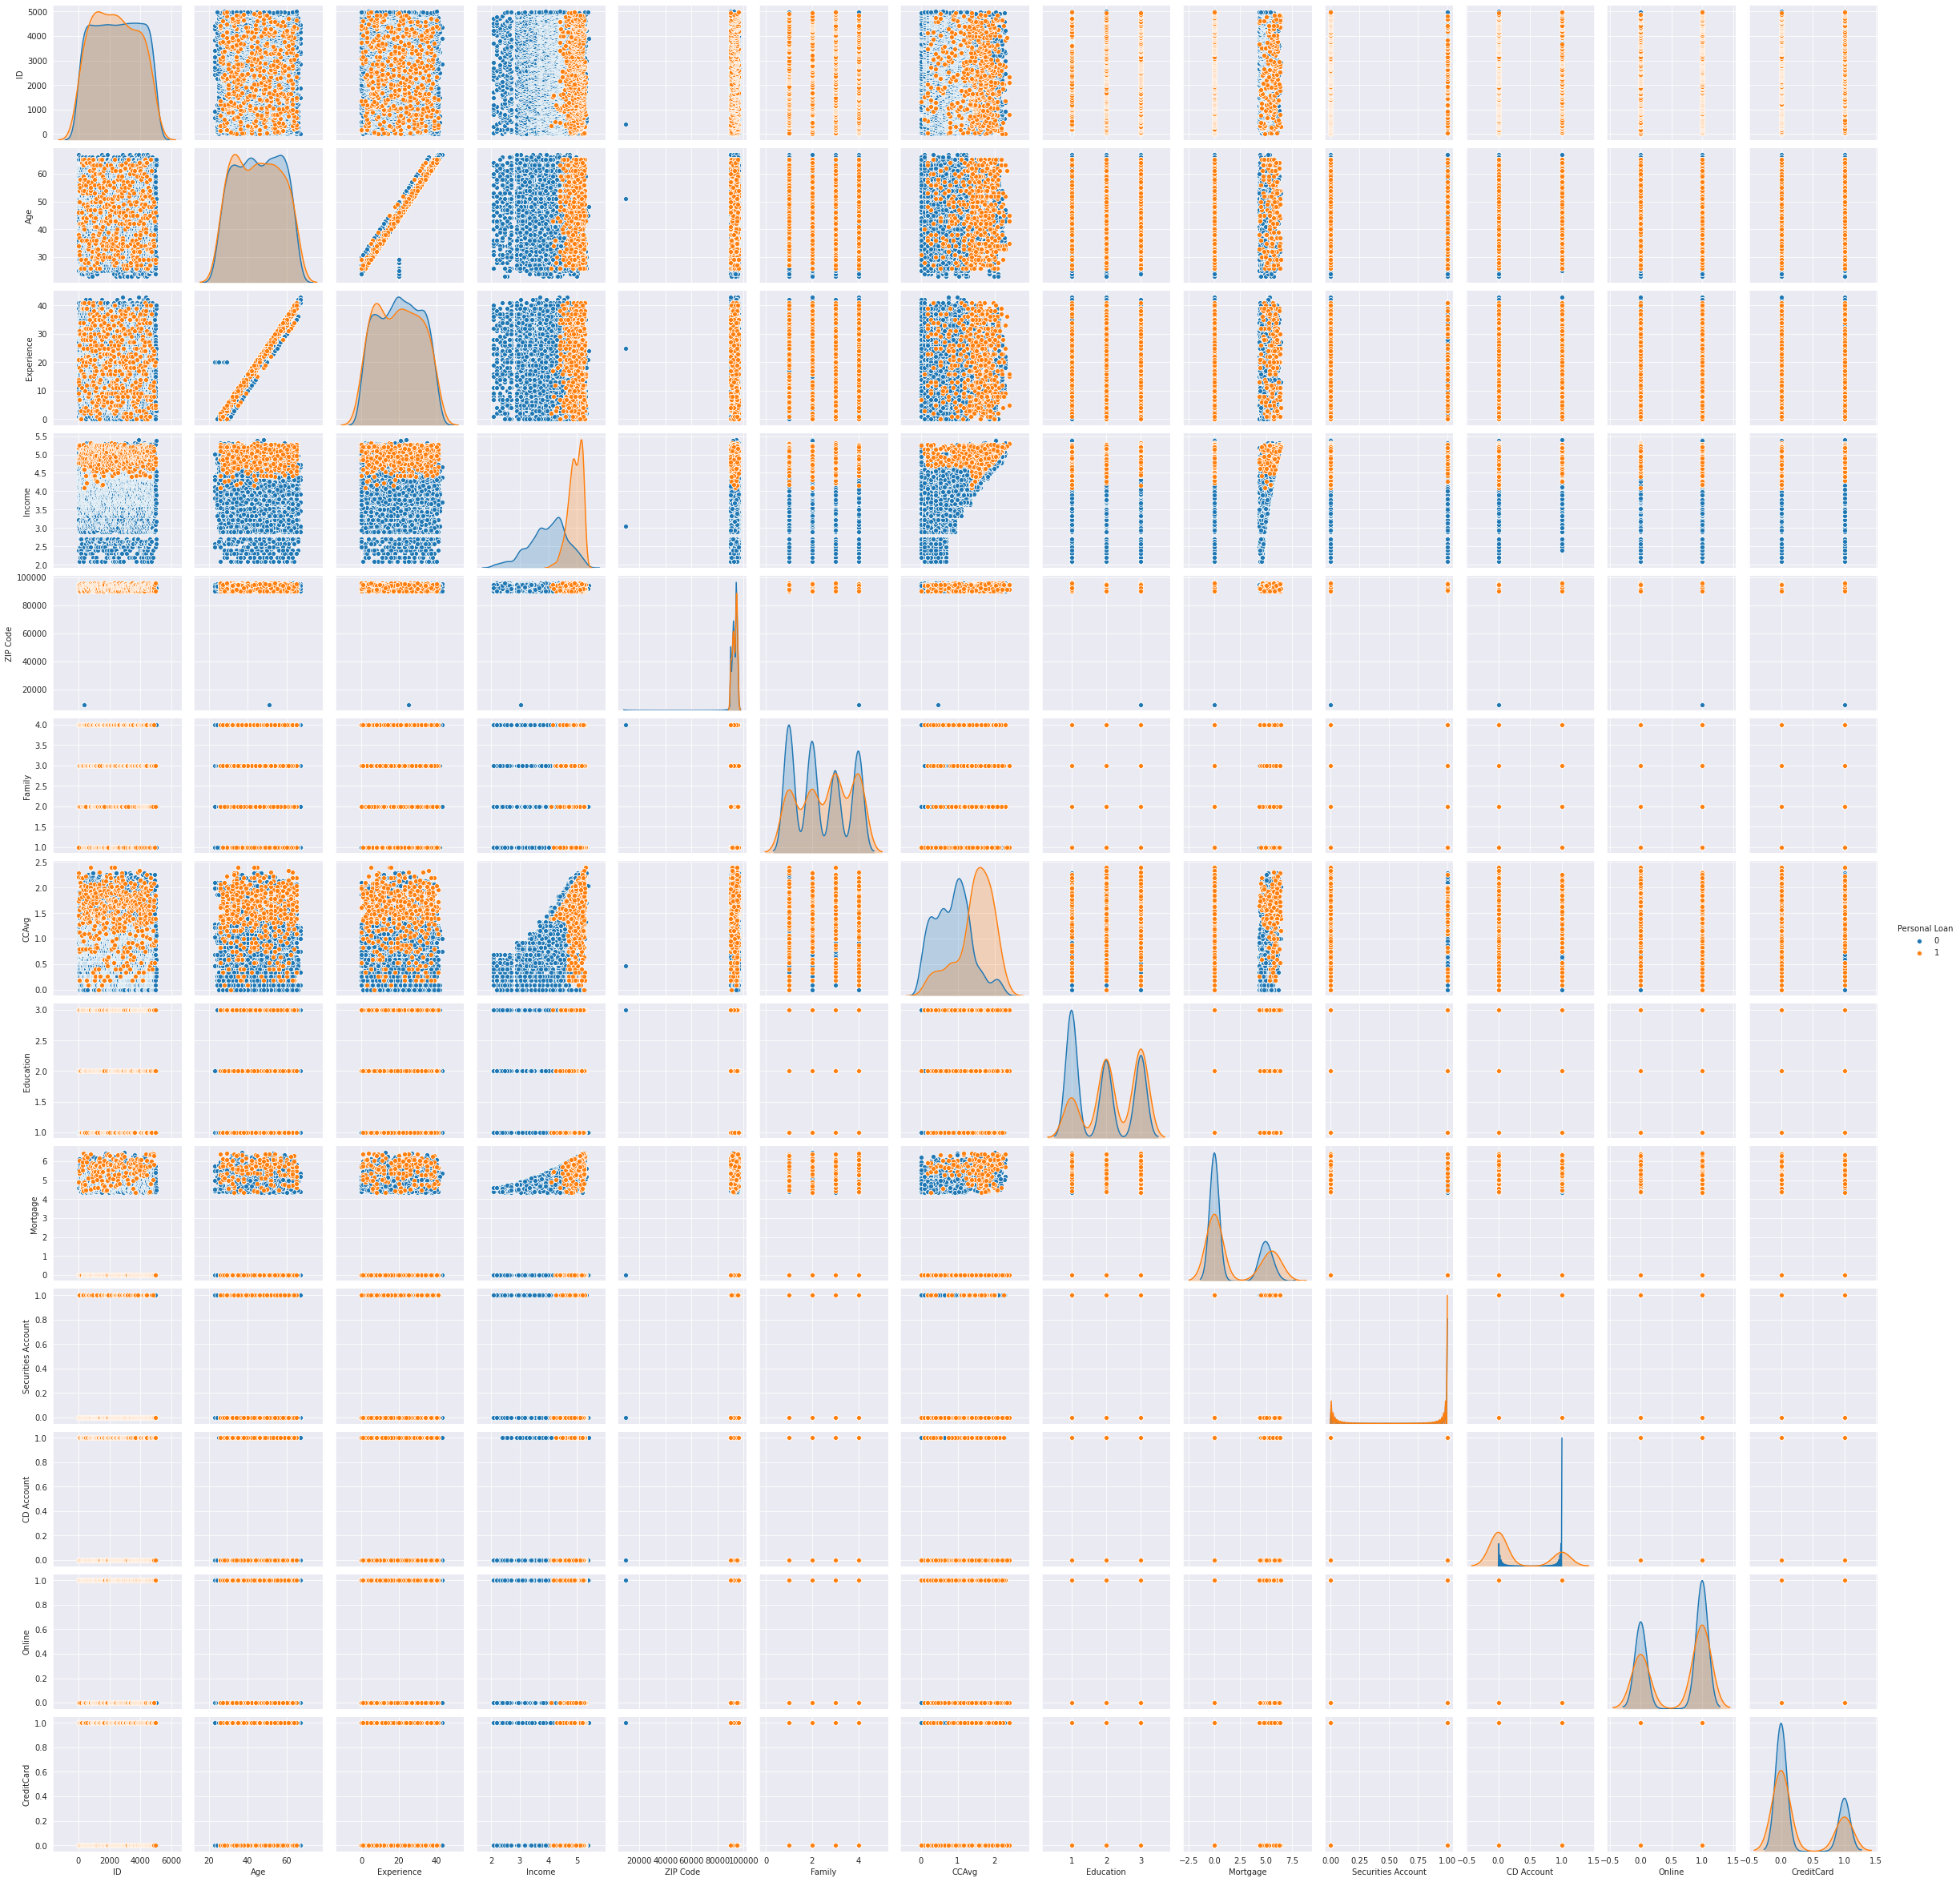

In [59]:
plt.figure(figsize = (16,16))
sns.pairplot(data=bankData, diag_kind='kde', hue='Personal Loan')
print("Scatter Plot between all pairs of variables based on Personal Loan subscription")
plt.show()

From the diagnoal KDE plots, we can see that `Income` is a good predictor of target classes due to the minimal overlap. Similarly, `CCAvg` also has better segregation of KDE plots. However, `Income` ans `CCAvg` seems to be positively correlated. 

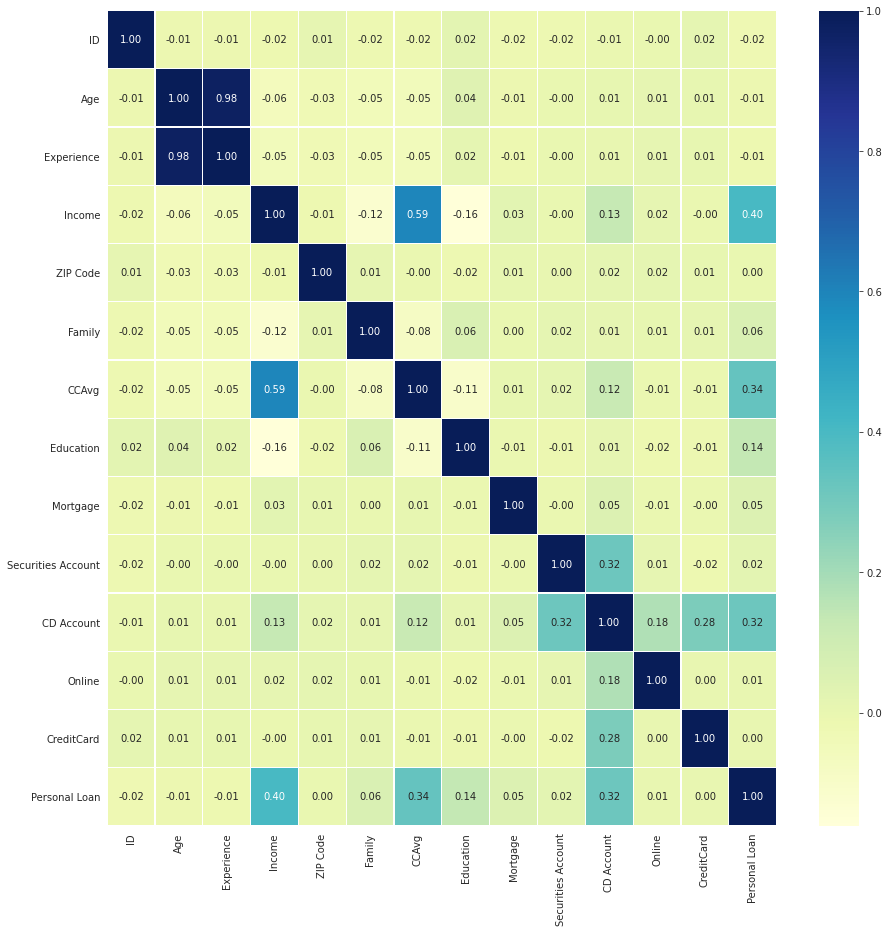

In [60]:
plt.figure(figsize=(15,15))
sns.heatmap(bankData.corr(), annot=True, fmt=".2f", linewidth=0.2, cmap='YlGnBu')
plt.show()

**Observations from the Pairwise plots and Correlation Heatmap:**
- `Age` and `Experience` are highly correlated. It is better to drop one of them. 
- `Income` and `CCAvg` have positive correlation. 
- Target variable `Personal Loan` has positive correlation with `Income` and moderate correlation with `CCAvg` and `CD Account` variables. 
- Target variable `Personal Loan` has no correlation with `ZIP Code`, `Online` and `CreditCard` variables. It is better to drop them from our Model.

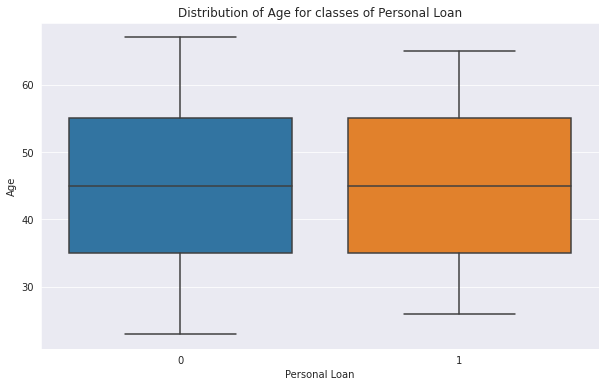

In [61]:
#Distribution of Age vs Personal Loan
plt.figure(figsize=(10,6))
sns.boxplot(data=bankData, y='Age', x='Personal Loan')
plt.title("Distribution of Age for classes of Personal Loan")
plt.show()

There is no visual difference observed between Personal Loan subscribers vs non-subscribers for different Age groups.

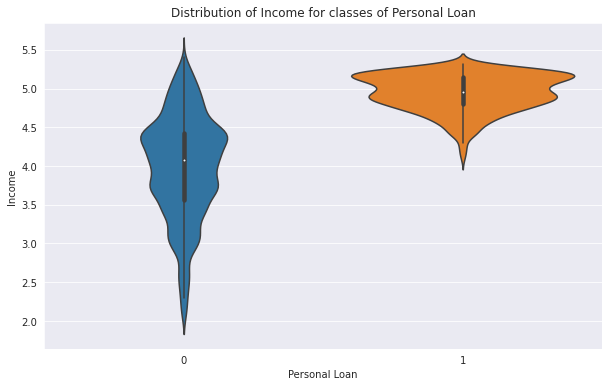

In [62]:
#Distribution of Income vs Personal Loan
plt.figure(figsize=(10,6))
sns.violinplot(data=bankData, y='Income', x='Personal Loan')
plt.title("Distribution of Income for classes of Personal Loan")
plt.show()

Income brackets of Personal Loan subscribers vs non-subscribers is significantly different with most of the Customers in higher income bracket are opting for Personal Loan also (this might indicate the better lifestyle needs of those in higher income brackets).

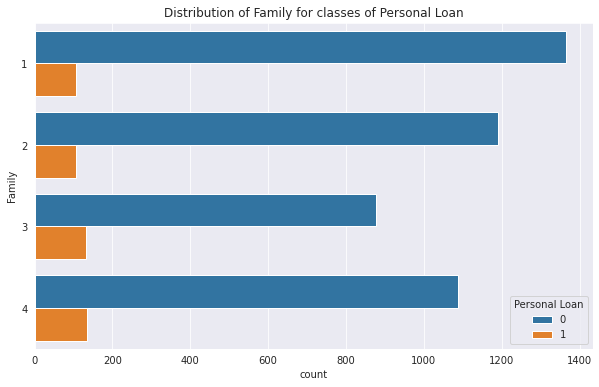

In [63]:
#Distribution of Family vs Personal Loan
plt.figure(figsize=(10,6))
sns.countplot(data=bankData, y='Family', hue='Personal Loan')
plt.title("Distribution of Family for classes of Personal Loan")
plt.show()

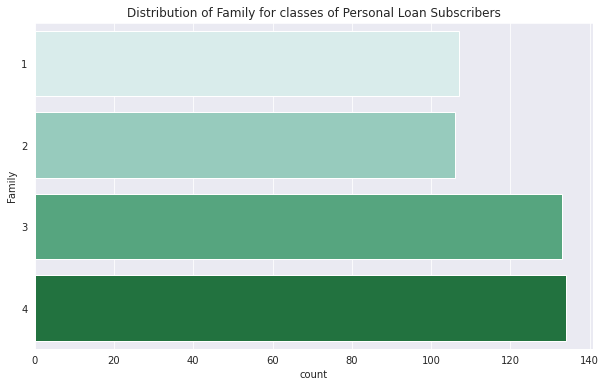

In [64]:
#Distribution of Family vs Personal Loan subscribers
plt.figure(figsize=(10,6))
sns.countplot(data=bankData[bankData["Personal Loan"]==1], y='Family', palette='BuGn')
plt.title("Distribution of Family for classes of Personal Loan Subscribers")
plt.show()

Customers with bigger Family size tend to subscribe more to Personal Loans. 

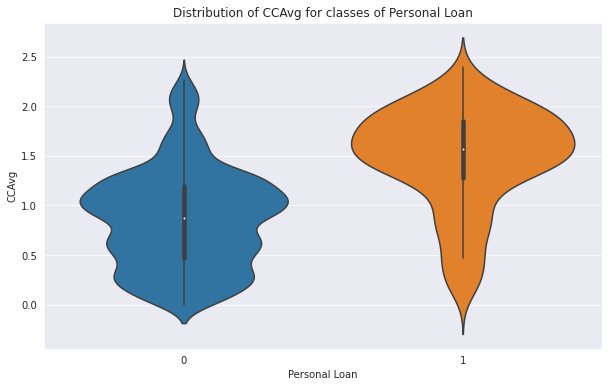

In [65]:
#Distribution of CCAvg vs Personal Loan
plt.figure(figsize=(10,6))
sns.violinplot(data=bankData, y='CCAvg', x='Personal Loan')
plt.title("Distribution of CCAvg for classes of Personal Loan")
plt.show()

Customers with higher Credit Card spending tends to be those who have subscribed most to the Personal Loan campaigns.

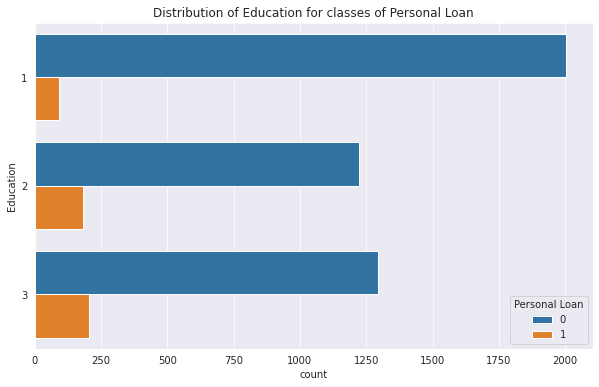

In [66]:
#Distribution of Education vs Personal Loan
plt.figure(figsize=(10,6))
sns.countplot(data=bankData, y='Education', hue='Personal Loan')
plt.title("Distribution of Education for classes of Personal Loan")
plt.show()

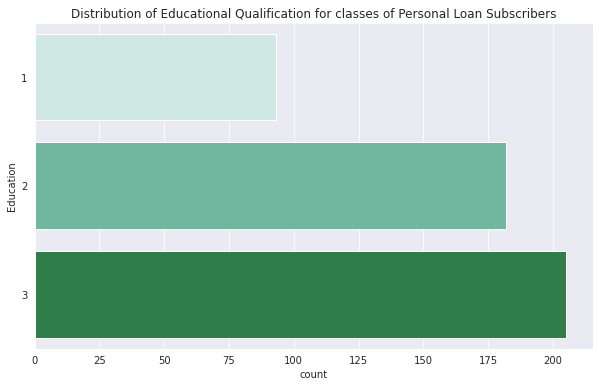

In [67]:
#Distribution of Education vs Personal Loan subscribers
plt.figure(figsize=(10,6))
sns.countplot(data=bankData[bankData["Personal Loan"]==1], y='Education', palette='BuGn')
plt.title("Distribution of Educational Qualification for classes of Personal Loan Subscribers")
plt.show()

We can say that the Customers with better Educational qualification tends to purchase Personal Loans, though not a strong relationship.

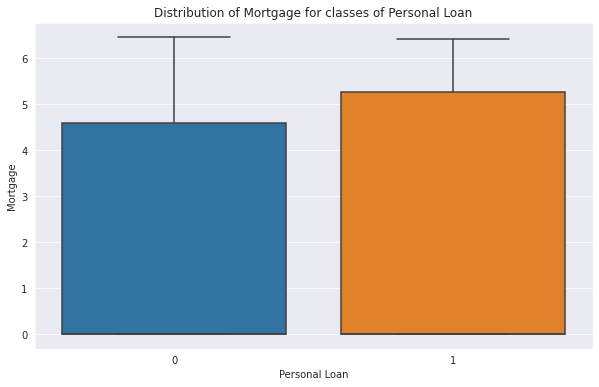

In [68]:
#Distribution of Mortgage vs Personal Loan
plt.figure(figsize=(10,6))
sns.boxplot(data=bankData, y='Mortgage', x='Personal Loan')
plt.title("Distribution of Mortgage for classes of Personal Loan")
plt.show()

No significant relationsship witnessed between Mortgage values and Personal Loans.

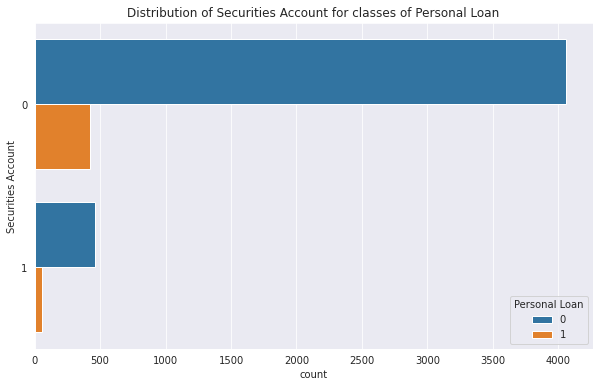

In [69]:
#Distribution of Securities Account vs Personal Loan
plt.figure(figsize=(10,6))
sns.countplot(data=bankData, y='Securities Account', hue='Personal Loan')
plt.title("Distribution of Securities Account for classes of Personal Loan")
plt.show()

Though people with Securities Account has lower Personal Loan subscriptions, the proportion of people without Securities Account is so large that we cannot deduce any relationship visually.

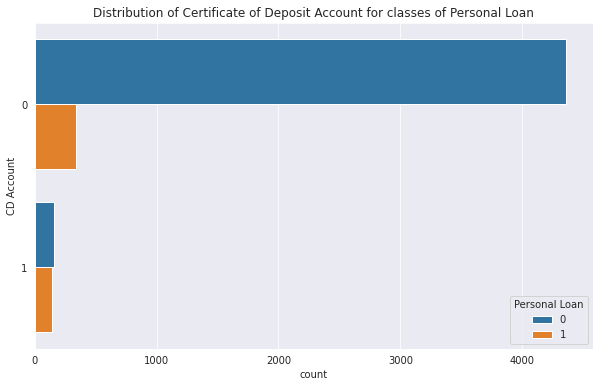

In [70]:
#Distribution of Certificate of Deposit Account vs Personal Loan
plt.figure(figsize=(10,6))
sns.countplot(data=bankData, y='CD Account', hue='Personal Loan')
plt.title("Distribution of Certificate of Deposit Account for classes of Personal Loan")
plt.show()

Personal Loan subscribers with Certificate of Deposit account is almost same as those without Certificate of Deposit account.

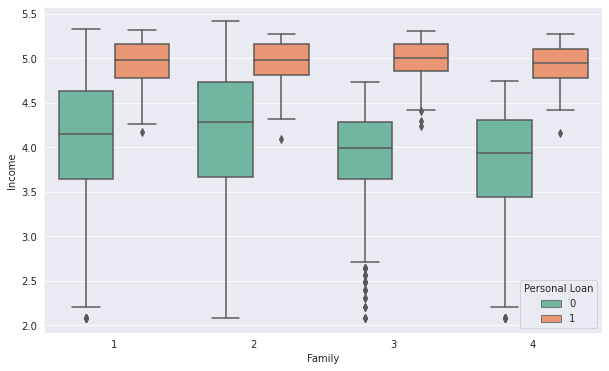

In [71]:
#Distibution of Income vs Family vs Personal Loan
plt.figure(figsize=(10,6))
sns.boxplot(x='Family', y='Income', hue='Personal Loan', data=bankData, palette = 'Set2');

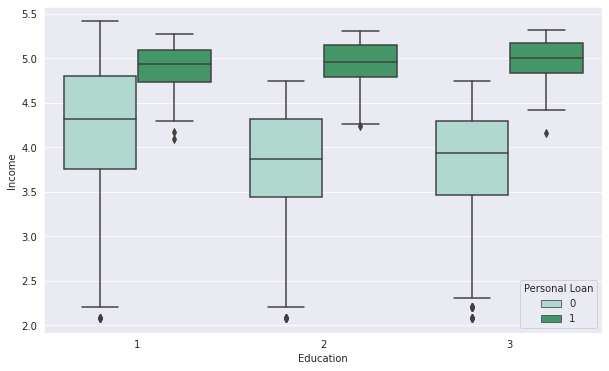

In [72]:
#Distibution of Income vs Education vs Personal Loan
plt.figure(figsize=(10,6))
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data=bankData, palette='BuGn');

We won't be visualizing the plots for `Online` and `Credit Card` since the correlation values between `Personal Loan` and these two variables is almost '0'. 

# Step 3: Data Preparation & Preprocessing

##### Action Items from the Exploratory Data Analysis:
1. Drop `ID`, `Experience`, `ZIP Code` columns from the Dataset.

In [73]:
bank = bankData.drop(['ID', 'Experience','ZIP Code'], axis=1)
bank.head(3)

Age    Income  Family  ...  Online  CreditCard  Personal Loan
0   25  3.891820       4  ...       0           0              0
1   45  3.526361       3  ...       0           0              0
2   39  2.397895       1  ...       0           0              0

[3 rows x 11 columns]

# Step 4 : Splitting the Data into Train and Test (Validation) sets

In [74]:
X = bank.drop('Personal Loan', axis=1)
y = bank['Personal Loan']

print(X.shape)
print(y.shape)

#Stratify is used to preserve proportion of target classes in splits, since the Class in Imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state = 24)

(5000, 10)
(5000,)


In [75]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 10)

(1500, 10)

(3500,)

(1500,)

Dataset will be scaled so that different features with different metric units are comparable. Also, since we will be using **K-Nearest Neighbors** algorithm which is a distance-based model, it becomes imperative to do scaling prior to model building. 

In [76]:
#StandardScaler from Scikit Learn
scaler = StandardScaler()

#Fitting the Training set
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler is instantiated with X_train information (mean and StdDev). We will use the instance to *'tranform'* both train and test sets. This is to protect X_test from training information.

In [77]:
scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.91143781,  0.86205567, -0.32547471, ..., -0.25519556,
        -1.22912994, -0.63821474],
       [ 1.37526067,  1.00263967, -0.32547471, ..., -0.25519556,
         0.81358363, -0.63821474],
       [-0.20783828, -2.7396554 , -0.32547471, ..., -0.25519556,
         0.81358363,  1.56687074],
       ...,
       [-0.20783828, -0.16970926, -0.32547471, ..., -0.25519556,
         0.81358363, -0.63821474],
       [ 1.0234609 , -1.09457558,  0.54477852, ..., -0.25519556,
         0.81358363,  1.56687074],
       [ 0.05601155, -0.50688019,  1.41503175, ..., -0.25519556,
         0.81358363, -0.63821474]])

# Step 5 : Model Building - Predict the likelihood of Customers Buying Personal Loans

We will be using the below Classifiers:
1.  Logistic Regression 
        - Logistic Regression - plain vanilla model
        - Logistic Regression - class weighted
        - Logistic Regression - Hyper parameter tuned
        - Logistic Regression - Statsmodel.api 
2.  K-Nearest Neighbors  Classifier
        - KNN - Default values of n_neighbor = 5
        - KNN - Hyper parameter tuned
3.  Naive Bayes Classifier (Gaussian NB)

## Model 1.  Logistic Regression using Scikit Learn

In [78]:
log_reg_ml = LogisticRegression(solver = 'lbfgs', max_iter=500) #lbgfs is the default solver
log_reg_ml.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression Model


Logistic Regression Model Accuracy for train set: 0.954
Logistic Regression Model Accuracy for test set: 0.961

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.87      0.70      0.78       144

    accuracy                           0.96      1500
   macro avg       0.92      0.85      0.88      1500
weighted avg       0.96      0.96      0.96      1500


Confusion Matrix:
 [[1341   15]
 [  43  101]]

Accuracy Score:
 0.961

Precision Score:
 0.871

Recall Score:
 0.701

F1 Score:
 0.777

ROC AUC Score:
 0.845

Gini Coefficient :
 0.69

Log Loss :
 1.34


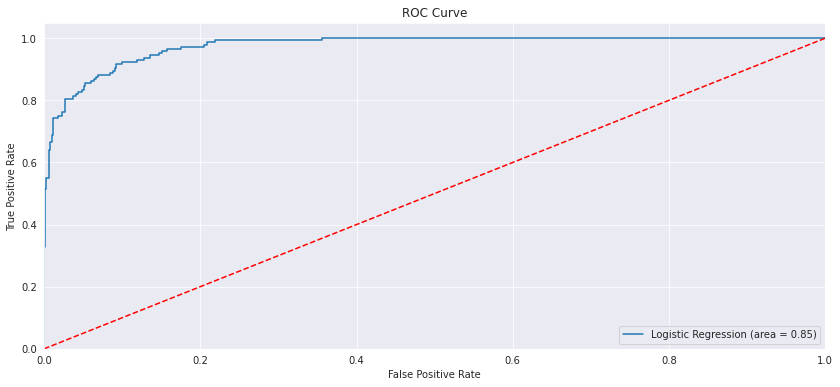

In [79]:
print('Logistic Regression Model\n\n')
print('Logistic Regression Model Accuracy for train set: {0:.3f}'.format(log_reg_ml.score(X_train, y_train)))
print('Logistic Regression Model Accuracy for test set: {0:.3f}'.format(log_reg_ml.score(X_test, y_test)))

y_true, y_pred = y_test, log_reg_ml.predict(X_test)

# Classification Report
print("\nClassification Report")
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
log_reg_cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', log_reg_cm)

# Accuracy Score
log_reg_acc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', log_reg_acc.round(3))

# Precision Score
log_reg_precision = precision_score(y_true, y_pred)
print('\nPrecision Score:\n', log_reg_precision.round(3))

# Recall Score
log_reg_recall = recall_score(y_true, y_pred)
print('\nRecall Score:\n', log_reg_recall.round(3))

# F1 Score
log_reg_f1 = f1_score(y_true, y_pred)
print('\nF1 Score:\n', log_reg_f1.round(3))

# ROC Curve
log_reg_roc_auc = roc_auc_score(y_true, log_reg_ml.predict(X_test))
print('\nROC AUC Score:\n', log_reg_roc_auc.round(3))

#Gini-Coefficient
log_reg_gini_coeff = 2 * log_reg_roc_auc -1
print("\nGini Coefficient :\n", log_reg_gini_coeff.round(2))

#Log Loss
log_loss_logr = log_loss(y_true, y_pred)
print("\nLog Loss :\n", log_loss_logr.round(2))

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_true, log_reg_ml.predict_proba(X_test)[:,1])
plt.figure(figsize = (14 , 6))
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression (area = {})'.format(log_reg_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

### Logistic Regression using Statsmodel Logit function

In [80]:
log_reg_sm = sm.Logit(y_train, X_train)
log_reg_sm_ml = log_reg_sm.fit()

Optimization terminated successfully.
         Current function value: 0.253568
         Iterations 8


In [81]:
log_reg_sm_ml.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.198     
Dependent Variable:   Personal Loan    AIC:              1794.9782 
Date:                 2020-09-13 16:26 BIC:              1856.5833 
No. Observations:     3500             Log-Likelihood:   -887.49   
Df Model:             9                LL-Null:          -1106.7   
Df Residuals:         3490             LLR p-value:      8.4351e-89
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.0578   0.0054 -10.6829 0.0000 -0.0685 -0.0472
Income             -0.3292   0.0855  -3.8501 0.0001 -0.4967 -0.1616
Family             -0.0252   0.0533  -0.4737 0.6357 -0.1297  0.0792
CCAvg               1.7192   0.1636  10.5057 0.0000  1.3984  2.0399
Education           0.2097   0.0718   2.9214 0.0035  0.0690  0.3503
Mortgage           -0.0141   0.0261  -0.5415 0.5882 -0.0652  0.0370
Securities Account -1.4261   0.2557  -5.5781 0.0000 -1.9272 -0.9250
CD Account          4.2218   0.2694  15.6736 0.0000  3.6939  4.7497
Online             -0.8816   0.1334  -6.6084 0.0000 -1.1431 -0.6201
CreditCard         -1.3710   0.1896  -7.2313 0.0000 -1.7426 -0.9994
===================================================================

"""

In [82]:
def get_significant_features(lm):
    var_p_vals = pd.DataFrame(lm.pvalues)
    var_p_vals['vars'] = var_p_vals.index
    var_p_vals.columns = ['p_vals','vars']
    return list(var_p_vals[var_p_vals['p_vals'] <= 0.05]['vars'])

In [83]:
significant_vars = get_significant_features(log_reg_sm_ml)
significant_vars

['Age',
 'Income',
 'CCAvg',
 'Education',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [84]:
log_reg_sm2 = sm.Logit(y_train, X_train[significant_vars])
log_reg_sm_ml2 = log_reg_sm2.fit()

Optimization terminated successfully.
         Current function value: 0.253643
         Iterations 8


In [85]:
log_reg_sm_ml2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.198     
Dependent Variable:   Personal Loan    AIC:              1791.5007 
Date:                 2020-09-13 16:26 BIC:              1840.7849 
No. Observations:     3500             Log-Likelihood:   -887.75   
Df Model:             7                LL-Null:          -1106.7   
Df Residuals:         3492             LLR p-value:      1.7356e-90
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.0581   0.0054 -10.7803 0.0000 -0.0686 -0.0475
Income             -0.3474   0.0809  -4.2924 0.0000 -0.5061 -0.1888
CCAvg               1.7361   0.1615  10.7495 0.0000  1.4196  2.0527
Education           0.2032   0.0708   2.8721 0.0041  0.0645  0.3419
Securities Account -1.4211   0.2551  -5.5712 0.0000 -1.9211 -0.9212
CD Account          4.2180   0.2682  15.7243 0.0000  3.6922  4.7437
Online             -0.8824   0.1332  -6.6235 0.0000 -1.1436 -0.6213
CreditCard         -1.3729   0.1896  -7.2405 0.0000 -1.7445 -1.0012
===================================================================

"""

#### Observations from Logistic Regression Model using statsmodel.api
`LLR p-value:	1.7356e-90` indicates that the Logistic Regression model built is significant.

## Logistic Regression with Class Weights for Imbalanced Dataset

In [86]:
log_reg_ml_wt = LogisticRegression(solver = 'lbfgs', max_iter=300, class_weight='balanced')
log_reg_ml_wt.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=300, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Note: 
 **The “balanced” mode uses the values of y to automatically adjust weights 
 inversely proportional to class frequencies in the input data as 
 `n_samples / (n_classes * np.bincount(y))`.**

Logistic Regression Model Class Weights Balanced 


Logistic Regression Model Accuracy for train set: 0.889
Logistic Regression Model Accuracy for test set: 0.889


Classification Report


              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1356
           1       0.46      0.93      0.62       144

    accuracy                           0.89      1500
   macro avg       0.73      0.91      0.78      1500
weighted avg       0.94      0.89      0.90      1500


Confusion Matrix:
 [[1199  157]
 [  10  134]]

Accuracy Score:
 0.889

Precision Score:
 0.46

Recall Score:
 0.931

F1 Score:
 0.616

ROC AUC Score:
 0.907

Gini Coefficient :
 0.69

Log Loss :
 3.85


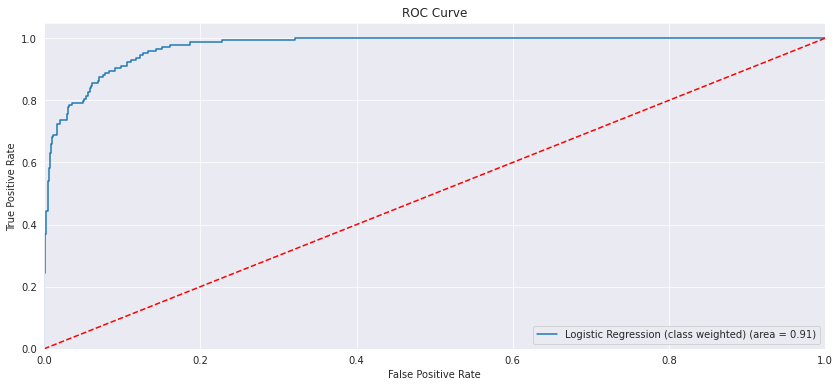

In [87]:
print('Logistic Regression Model Class Weights Balanced \n\n')
print('Logistic Regression Model Accuracy for train set: {0:.3f}'.format(log_reg_ml_wt.score(X_train, y_train)))
print('Logistic Regression Model Accuracy for test set: {0:.3f}'.format(log_reg_ml_wt.score(X_test, y_test)))
print("\n")
y_true, y_pred = y_test, log_reg_ml_wt.predict(X_test)

# Classification Report
print("Classification Report\n")
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
log_reg_wt_cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', log_reg_wt_cm)

# Accuracy Score
log_reg_wt_acc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', log_reg_wt_acc.round(3))

# Precision Score
log_reg_wt_precision = precision_score(y_true, y_pred)
print('\nPrecision Score:\n', log_reg_wt_precision.round(3))

# Recall Score
log_reg_wt_recall = recall_score(y_true, y_pred)
print('\nRecall Score:\n', log_reg_wt_recall.round(3))

# F1 Score
log_reg_wt_f1 = f1_score(y_true, y_pred)
print('\nF1 Score:\n', log_reg_wt_f1.round(3))

# ROC Curve
log_reg_wt_roc_auc = roc_auc_score(y_true, log_reg_ml_wt.predict(X_test))
print('\nROC AUC Score:\n', log_reg_wt_roc_auc.round(3))

#Gini-Coefficient
log_reg_wt_gini_coeff = 2 * log_reg_roc_auc -1
print("\nGini Coefficient :\n", log_reg_wt_gini_coeff.round(2))

#Log Loss
log_loss_class_wt = log_loss(y_true, y_pred)
print("\nLog Loss :\n", log_loss_class_wt.round(2))

fpr_lr_wt, tpr_lr_wt, thresholds_lr_wt = roc_curve(y_true, log_reg_ml_wt.predict_proba(X_test)[:,1])
plt.figure(figsize = (14 , 6))
plt.plot(fpr_lr_wt, tpr_lr_wt, label = 'Logistic Regression (class weighted) (area = {})'.format(log_reg_wt_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

Let us try to find the best parameters using GridSearchCV (Hyperparameter tuning)

Logistic Regression Scores with Hyperparameter Tuning


Best Estimator : 
 LogisticRegression(C=100, class_weight={0: 1, 1: 1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=50, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=24, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Best Hyper Parameters : 
 {'C': 100, 'class_weight': {0: 1, 1: 1}, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score : 
 0.966
Logistic Regression (tuned) accuracy for train set: 0.966
Logistic Regression (tuned) accuracy for test set: 0.975


Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.87      0.72      0.79       144

    accuracy                           0.96      1500
   macro avg       0.92      0.85      0.88      1500
weighted avg       0.96      0.96 

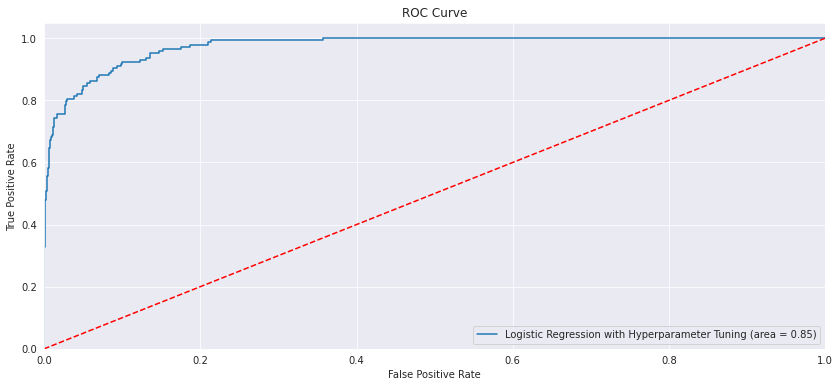

In [88]:
# Logistic Regression with hyperparameter tuning
log_reg = LogisticRegression(random_state = 24)

params = {'penalty': ['l1', 'l2'], 
          'C': [0.001, 0.01, 0.1, 1, 10, 100], 
          'solver' : ['lbfgs', 'liblinear','newton-cg', 'sag', 'saga'], 
          'class_weight' : [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
          'max_iter': [50, 100, 150, 200]}

log_reg_tuned = GridSearchCV(log_reg, param_grid = params, scoring = 'roc_auc', n_jobs = -1, cv = StratifiedKFold(n_splits = 10))
#ROC_AUC_Score is used for Scoring since the given dataset has Class Imbalance. 

log_reg_tuned.fit(X_train, y_train)

print('Logistic Regression Scores with Hyperparameter Tuning\n\n')
print('Best Estimator : \n', log_reg_tuned.best_estimator_)
print('Best Hyper Parameters : \n', log_reg_tuned.best_params_)
print('Best Score : \n', log_reg_tuned.best_score_.round(3))

#print('Cross Validation Results:\n', log_reg_tuned.cv_results_ )
print('Logistic Regression (tuned) accuracy for train set: {0:.3f}'.format(log_reg_tuned.score(X_train, y_train)))
print('Logistic Regression (tuned) accuracy for test set: {0:.3f}'.format(log_reg_tuned.score(X_test, y_test)))

y_true, y_pred = y_test, log_reg_tuned.predict(X_test)

# Classification Report
print("\n")
print("Classification Report")
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
log_reg_tuned_cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', log_reg_tuned_cm)

# Accuracy Score
log_reg_tuned_accuracy = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', log_reg_tuned_accuracy.round(3))

# Precision Score
log_reg_tuned_precision = precision_score(y_true, y_pred)
print('\nPrecision Score:\n', log_reg_tuned_precision.round(3))

# Recall Score
log_reg_tuned_recall = recall_score(y_true, y_pred)
print('\nRecall Score:\n', log_reg_tuned_recall.round(3))

# F1 Score
log_reg_tuned_f1 = f1_score(y_true, y_pred)
print('\nF1 Score:\n', log_reg_tuned_f1.round(3))

# ROC Curve
log_reg_tuned_roc_auc = roc_auc_score(y_true, log_reg_tuned.predict(X_test))
print('\nROC AUC Score:\n', log_reg_tuned_roc_auc.round(3))

#Gini-Coefficient
log_reg_tuned_gini_coeff = 2 * log_reg_tuned_roc_auc -1
print("\nGini Coefficient :\n", log_reg_tuned_gini_coeff.round(2))

#Log Loss
log_loss_tuned = log_loss(y_true, y_pred)
print("\nLog Loss :\n", log_loss_tuned.round(2))

fpr2, tpr2, thresholds2 = roc_curve(y_true, log_reg_tuned.predict_proba(X_test)[:,1])
plt.figure(figsize = (14, 6))
plt.plot(fpr2, tpr2, label = 'Logistic Regression with Hyperparameter Tuning (area = {})'.format(log_reg_tuned_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

### Summary of all Logistic Regression Model Performance based on ROC AUC

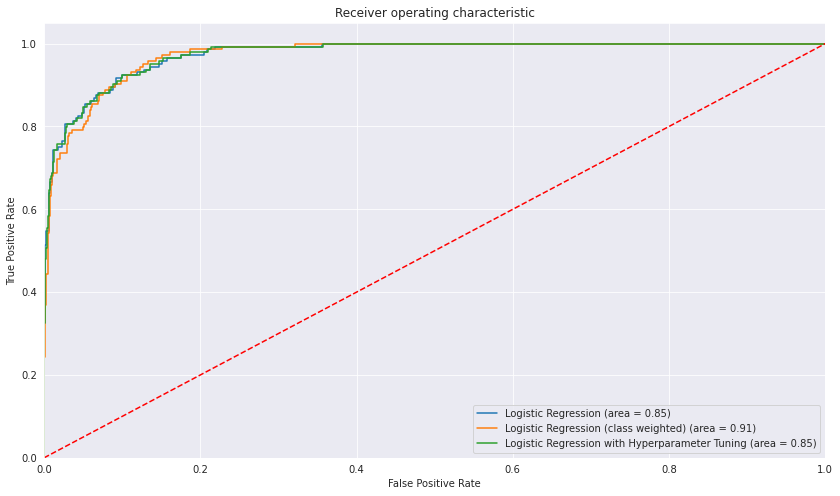

In [89]:
plt.figure(figsize = (14 , 8))

#Plain vanilla Model
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression (area = {})'.format(log_reg_roc_auc.round(2)))

#Class-weighted
plt.plot(fpr_lr_wt, tpr_lr_wt, label = 'Logistic Regression (class weighted) (area = {})'.format(log_reg_wt_roc_auc.round(2)))

#Hyper Parameter Tuned
plt.plot(fpr2, tpr2, label = 'Logistic Regression with Hyperparameter Tuning (area = {})'.\
         format(log_reg_tuned_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

## Model 2.  K-Nearest Neighbors  Classifier

In [90]:
# k = sqrt(no of features)
n = int(np.sqrt(X_train.shape[1])) #Choosing K value based on heuristic of sqrt(no. of features)
print("No of Neighbors is : ", n)

knn_ml = KNeighborsClassifier(n_neighbors=n)
knn_ml.fit(X_train, y_train)

No of Neighbors is :  3


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNN Classifier Model


KNN Classifier Model Accuracy for train set: 0.956
KNN Classifier Model Accuracy for test set: 0.929

Classification Report

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1356
           1       0.86      0.31      0.45       144

    accuracy                           0.93      1500
   macro avg       0.90      0.65      0.71      1500
weighted avg       0.92      0.93      0.91      1500


Confusion Matrix:
 [[1349    7]
 [ 100   44]]

Accuracy Score:
 0.929

Precision Score:
 0.863

Recall Score:
 0.306

F1 Score:
 0.451

ROC AUC Score:
 0.65

Gini Coefficient :
 0.3


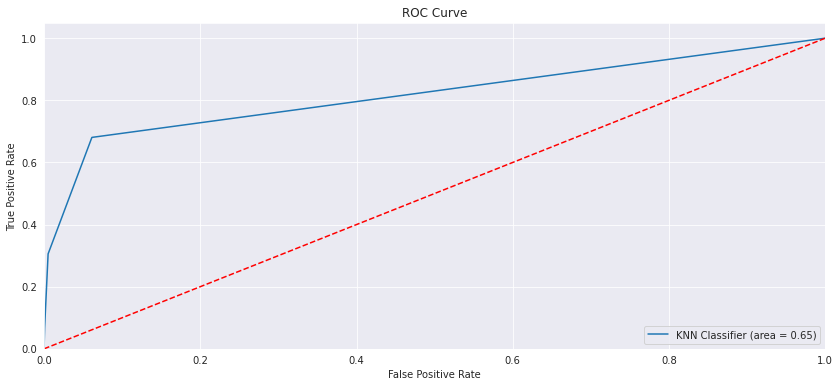

In [91]:
print('KNN Classifier Model\n\n')
print('KNN Classifier Model Accuracy for train set: {0:.3f}'.format(knn_ml.score(X_train, y_train)))
print('KNN Classifier Model Accuracy for test set: {0:.3f}'.format(knn_ml.score(X_test, y_test)))

y_true, y_pred = y_test, knn_ml.predict(X_test)

# Classification Report
print('\nClassification Report')
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
knn_cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', knn_cm)

# Accuracy Score
knn_acc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', knn_acc.round(3))

# Precision Score
knn_precision = precision_score(y_true, y_pred)
print('\nPrecision Score:\n', knn_precision.round(3))

# Recall Score
knn_recall = recall_score(y_true, y_pred)
print('\nRecall Score:\n', knn_recall.round(3))

# F1 Score
knn_f1 = f1_score(y_true, y_pred)
print('\nF1 Score:\n', knn_f1.round(3))

# ROC Curve
knn_roc_auc = roc_auc_score(y_true, knn_ml.predict(X_test))
print('\nROC AUC Score:\n', knn_roc_auc.round(3))

#Gini-Coefficient
knn_gini_coeff = 2 * knn_roc_auc -1
print("\nGini Coefficient :\n", knn_gini_coeff.round(2))

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_true, knn_ml.predict_proba(X_test)[:,1])
plt.figure(figsize = (14 , 6))
plt.plot(fpr_knn, tpr_knn, label = 'KNN Classifier (area = {})'.format(knn_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

### KNN with Hyper Parameter Tuning

KNN Scores with Hyperparameter Tuning


Best Estimator : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
Best Hyper Parameters :  {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score :  0.428
KNN (tuned) accuracy for train set: 1.000
KNN (tuned) accuracy for test set: 0.479


Classification Report

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1356
           1       0.70      0.48      0.57       144

    accuracy                           0.93      1500
   macro avg       0.83      0.73      0.77      1500
weighted avg       0.92      0.93      0.92      1500


Confusion Matrix:
 [[1327   29]
 [  75   69]]

Accuracy Score:
 0.931

Precision Score:
 0.704

Recall Score:
 0.479

F1 Score:
 0.57

ROC AUC Score:
 0.729

Gini Coefficient :
 0.46


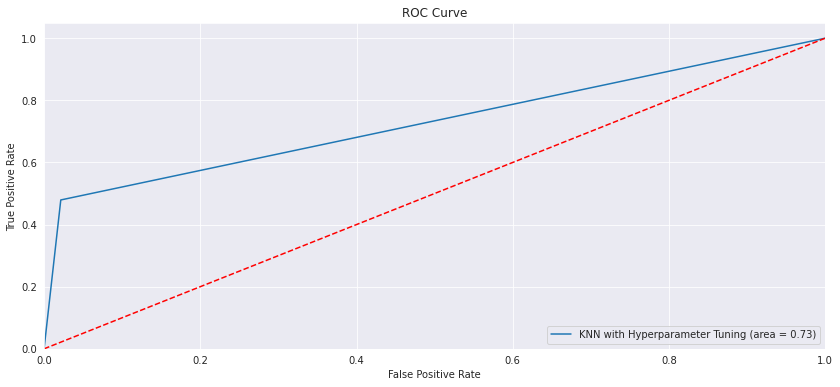

In [92]:
# KNN with hyperparameter tuning
knn = KNeighborsClassifier()

# params = {'n_neighbors': list(range(1, 20, 2)), 'weights': ['uniform', 'distance'],
          # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
          # }

params = {'n_neighbors': list(range(1, 30, 2)), 'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
          }

knn_tuned = GridSearchCV(knn, param_grid = params, n_jobs = -1, scoring = 'roc_auc', cv = StratifiedKFold(n_splits = 10))

knn_tuned.fit(X_train, y_train)

print('KNN Scores with Hyperparameter Tuning\n\n')
print('Best Estimator :', knn_tuned.best_estimator_)
print('Best Hyper Parameters : ', knn_tuned.best_params_)
print('Best Score : ', knn_tuned.best_score_.round(3))

print('KNN (tuned) accuracy for train set: {0:.3f}'.format(knn_tuned.score(X_train, y_train)))
print('KNN (tuned) accuracy for test set: {0:.3f}'.format(knn_tuned.score(X_test, y_test)))

y_true, y_pred = y_test, knn_tuned.predict(X_test)

# Classification Report
print("\n")
print("Classification Report")
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
knn_tuned_cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', knn_tuned_cm)

# Accuracy Score
knn_tuned_accuracy = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', knn_tuned_accuracy.round(3))

# Precision Score
knn_tuned_precision = precision_score(y_true, y_pred)
print('\nPrecision Score:\n', knn_tuned_precision.round(3))

# Recall Score
knn_tuned_recall = recall_score(y_true, y_pred)
print('\nRecall Score:\n', knn_tuned_recall.round(3))

# F1 Score
knn_tuned_f1 = f1_score(y_true, y_pred)
print('\nF1 Score:\n', knn_tuned_f1.round(3))

# ROC Curve
knn_tuned_roc_auc = roc_auc_score(y_true, knn_tuned.predict(X_test))
print('\nROC AUC Score:\n', knn_tuned_roc_auc.round(3))

#Gini-Coefficient
knn_tuned_gini_coeff = 2 * knn_tuned_roc_auc -1
print("\nGini Coefficient :\n", knn_tuned_gini_coeff.round(2))

fpr_knn_tuned, tpr_knn_tuned, thresholds_knn_tuned = roc_curve(y_true, knn_tuned.predict_proba(X_test)[:,1])
plt.figure(figsize = (14, 6))
plt.plot(fpr_knn_tuned, tpr_knn_tuned, label = 'KNN with Hyperparameter Tuning (area = {})'.format(knn_tuned_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

### Finding the Optimal K-value

Let us find the optimal k-value for KNN using the model performance metrics and error plot.

In [93]:
# List of Odd Numbers for as probable K-values, since it is a binary classifier problem
# K = 1 is omitted since K=1 model will overfit the entire training set. 
# Odd values are preferred since our dataset is Binary classification problem.
k_list = list(range(3,20,2))
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19]

In [94]:
# List to store ROC AUC Scores
roc_auc_scores = []

# Fit and Predict values for 'k'values from 1,3,5....19
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores = roc_auc_score(y_test, y_pred) #Use ROC AUC instead of Accuracy Score because of class imbalance
    roc_auc_scores.append(scores)

rocauc = roc_auc_scores

# Optimal K-value is the one with maximum ROC AUC Score
optimal_k = k_list[rocauc.index(max(rocauc))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


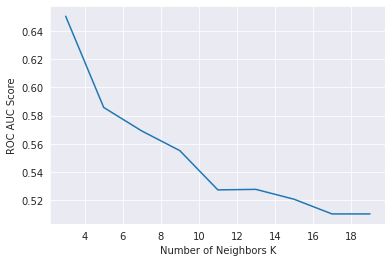

In [95]:
# plot misclassification error vs k
plt.plot(k_list, rocauc)
plt.xlabel('Number of Neighbors K')
plt.ylabel('ROC AUC Score')
plt.show()

**From GridSearch:**

Best Estimator : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [96]:
#From Optimal K-value calculation
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


From the error plot, we can verify the Best Parameters derived from Hyperparameter Tuning exercise.

***KNN Scores with Hyperparameter Tuning***
Best Hyper Parameters :  {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

## Model 3.  Naive Bayes Classifier (Gaussian NB)

In [97]:
gnb_ml = GaussianNB()
gnb_ml.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Gaussian Naive Bayes Classifier Model


Gaussian Naive Bayes Classifier Model Accuracy for train set: 0.915
Gaussian Naive Bayes Classifier Model Accuracy for test set: 0.907

Classification Report

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1356
           1       0.52      0.46      0.49       144

    accuracy                           0.91      1500
   macro avg       0.73      0.71      0.72      1500
weighted avg       0.90      0.91      0.90      1500


Confusion Matrix:
 [[1295   61]
 [  78   66]]

Accuracy Score:
 0.907

Precision Score:
 0.52

Recall Score:
 0.458

F1 Score:
 0.487

Gini Coefficient :
 0.41


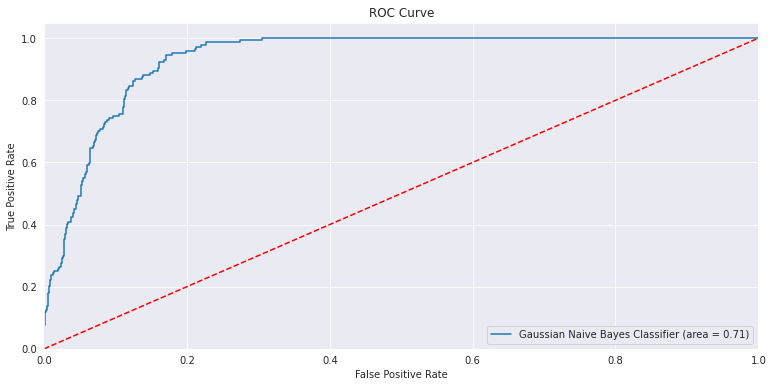

In [98]:
print('Gaussian Naive Bayes Classifier Model\n\n')
print('Gaussian Naive Bayes Classifier Model Accuracy for train set: {0:.3f}'.format(gnb_ml.score(X_train, y_train)))
print('Gaussian Naive Bayes Classifier Model Accuracy for test set: {0:.3f}'.format(gnb_ml.score(X_test, y_test)))

y_true, y_pred = y_test, gnb_ml.predict(X_test)

# Classification Report
print("\nClassification Report")
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
gnb_cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', gnb_cm)

# Accuracy Score
gnb_acc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', gnb_acc.round(3))

# Precision Score
gnb_precision = precision_score(y_true, y_pred)
print('\nPrecision Score:\n', gnb_precision.round(3))

# Recall Score
gnb_recall = recall_score(y_true, y_pred)
print('\nRecall Score:\n', gnb_recall.round(3))

# F1 Score
gnb_f1 = f1_score(y_true, y_pred)
print('\nF1 Score:\n', gnb_f1.round(3))

# ROC Curve
gnb_roc_auc = roc_auc_score(y_true, gnb_ml.predict(X_test))

#Gini-Coefficient
gnb_gini_coeff = 2 * gnb_roc_auc -1
print("\nGini Coefficient :\n", gnb_gini_coeff.round(2))

fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_true, gnb_ml.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr_gnb, tpr_gnb, label = 'Gaussian Naive Bayes Classifier (area = {})'.format(gnb_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

# Step 6 : Model Evaluation & Selection

### Model Evaluation with Confusion Matrix

Since the dataset has class imbalance, Accuracy is not a good measure of model performance. Hence, we will resort to below performance measures for model evaluation:
1. Confusion Matrix
2. Recall score (also Precision Score)
3. ROC AUC Score
4. Gini Coefficient
5. Calibration curve (Reliability curve)

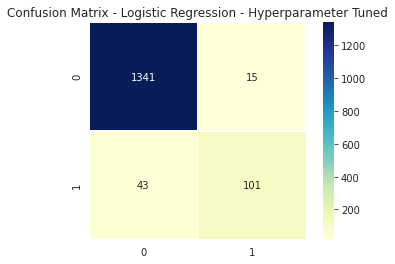

In [99]:
sns.heatmap(log_reg_cm, annot=True, fmt="2d", square=True, linewidth=0.2, cmap='YlGnBu')
plt.title("Confusion Matrix - Logistic Regression - Hyperparameter Tuned")
plt.show()

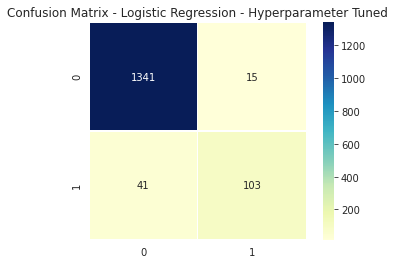

In [100]:
sns.heatmap(log_reg_tuned_cm, annot=True, fmt="2d", square=True, linewidth=0.2, cmap='YlGnBu')
plt.title("Confusion Matrix - Logistic Regression - Hyperparameter Tuned")
plt.show()

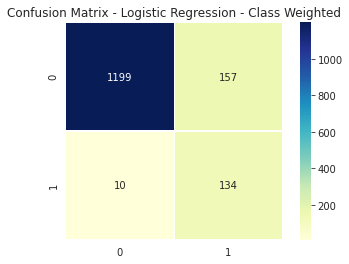

In [101]:
sns.heatmap(log_reg_wt_cm, annot=True, fmt="2d", square=True, linewidth=0.2, cmap='YlGnBu')
plt.title("Confusion Matrix - Logistic Regression - Class Weighted")
plt.show()

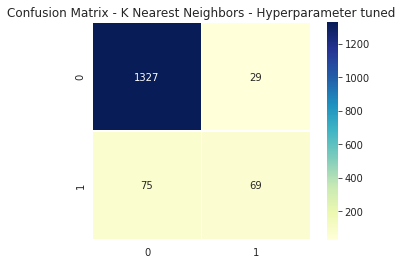

In [102]:
sns.heatmap(knn_tuned_cm, annot=True, fmt="2d", square=True, linewidth=0.2, cmap='YlGnBu')
plt.title("Confusion Matrix - K Nearest Neighbors - Hyperparameter tuned")
plt.show()

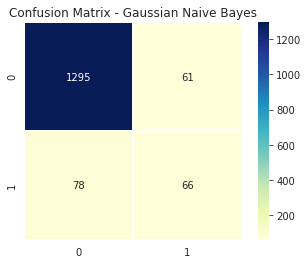

In [103]:
sns.heatmap(gnb_cm, annot=True, fmt="2d", square=True, linewidth=0.2, cmap='YlGnBu')
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

In [104]:
metrics = {'Classifier':['Logistic Regression Class Weighted','Logistic Regression HyperParameter Tuned','K-Nearest Neighbors','Gaussian Naive Bayes'],
           'Accuracy' : [log_reg_wt_acc, log_reg_tuned_accuracy, knn_tuned_accuracy,gnb_acc],
           'Precision':[log_reg_wt_precision, log_reg_tuned_precision, knn_tuned_precision, gnb_precision],
           'Recall':[log_reg_wt_recall, log_reg_tuned_recall, knn_tuned_recall, gnb_recall], 
           'F1-Score':[log_reg_wt_f1, log_reg_tuned_f1, knn_tuned_f1, gnb_f1], 
           'ROC AUC':[log_reg_wt_roc_auc, log_reg_tuned_roc_auc, knn_tuned_roc_auc, gnb_roc_auc], 
           'Gini Coeff':[log_reg_wt_gini_coeff, log_reg_tuned_gini_coeff, knn_tuned_gini_coeff, gnb_gini_coeff],
           'Log Loss':[log_loss_class_wt, log_loss_tuned, 0, 0] 
          }
model_eval_metrics = pd.DataFrame(metrics)
model_eval_metrics = model_eval_metrics.set_index('Classifier')
model_eval_metrics = model_eval_metrics.apply(lambda x: x.round(3))
model_eval_metrics

Accuracy  ...  Log Loss
Classifier                                          ...          
Logistic Regression Class Weighted           0.889  ...     3.845
Logistic Regression HyperParameter Tuned     0.963  ...     1.289
K-Nearest Neighbors                          0.931  ...     0.000
Gaussian Naive Bayes                         0.907  ...     0.000

[4 rows x 7 columns]

From the Confusion Matrices, we can see that Logistic Regression with Hyperparameter tuned provides the better balance of results for Precision (TP/TP+FP) and Recall (TP/TP+FN), especially from the Recall numbers.

Since the dataset has Class Imbalance, Accuracy is not a good measure. Few of the metrics we will leverage on for Model Selection are:
1. ROC AUC Score
2. F1 Score
3. Gini Coefficient
4. Recall Score vs Precision trade-off

### Model Evaluation with ROC AUC Scores

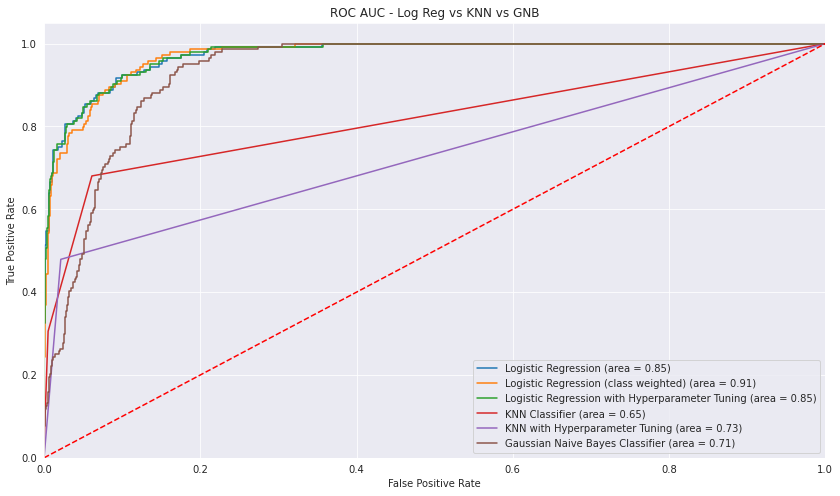

In [105]:
plt.figure(figsize = (14 , 8))

#Logistic Regression Plain vanilla Model
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression (area = {})'.format(log_reg_roc_auc.round(2)))

#Logistic Regression Class-weighted
plt.plot(fpr_lr_wt, tpr_lr_wt, label = 'Logistic Regression (class weighted) (area = {})'.format(log_reg_wt_roc_auc.round(2)))

# Logistic Regression Hyper Parameter Tuned
plt.plot(fpr2, tpr2, label = 'Logistic Regression with Hyperparameter Tuning (area = {})'.\
         format(log_reg_tuned_roc_auc.round(2)))

#KNN with No of Neighbors = sqrt(No of Features)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Classifier (area = {})'.format(knn_roc_auc.round(2)))

#KNN Hyper Parameter Tuned
plt.plot(fpr_knn_tuned, tpr_knn_tuned, label = 'KNN with Hyperparameter Tuning (area = {})'.\
         format(knn_tuned_roc_auc.round(2)))

#Gaussian Naive Bayes
plt.plot(fpr_gnb, tpr_gnb, label = 'Gaussian Naive Bayes Classifier (area = {})'.format(gnb_roc_auc.round(2)))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC - Log Reg vs KNN vs GNB')
plt.legend(loc = 'lower right')
plt.show()

### Model Evaluation with Precision vs Recall Curve

In [106]:
#Precision-Recall Curve - Logistic Regression with Hyperparameter tuned
y_scores_log_reg_tuned = log_reg_tuned.decision_function(X_train)

precisions_log_reg_tuned, recalls_log_reg_tuned, thresholds_log_reg_tuned = precision_recall_curve(y_train, y_scores_log_reg_tuned)

In [107]:
#Precision-Recall Curve - Logistic Regression with Class Weights
y_scores_log_reg_wt = log_reg_ml_wt.decision_function(X_train)

precisions_log_reg_wt, recalls_log_reg_wt, thresholds_log_reg_wt = precision_recall_curve(y_train, y_scores_log_reg_wt)

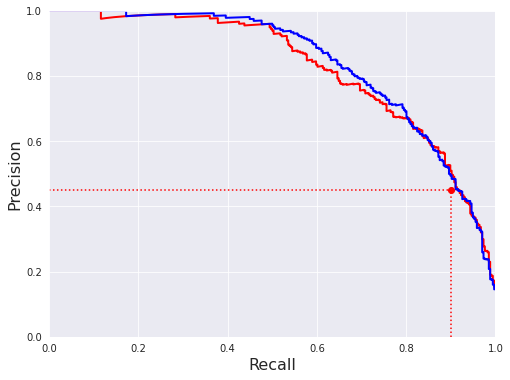

In [108]:
plt.figure(figsize=(8, 6))
plt.plot(recalls_log_reg_wt, precisions_log_reg_wt, "r-", linewidth=2)
plt.plot(recalls_log_reg_tuned, precisions_log_reg_tuned, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.plot([0.0, 0.9], [0.45, 0.45], "r:")
plt.plot([0.9, 0.9], [0.0, 0.45], "r:")
plt.plot([0.9], [0.45], "ro")
plt.show()

From the Precision vs Recall curve for both the Logistic Regression classifiers, we can see that,
- Logistic Regression with Class Weights provide better Recall (True Positive Rate) for our imbalanced dataset, however at the expense of poor Precision.
- Logistic Regression with Hyperparameter tuned model provides a better Recall (True Positive Rate) at a better Precision level, and is more dependable for validation sets.

### Plotting the Calibration Curve for all the Classifiers
Source: https://scikit-learn.org/stable/modules/calibration.html#calibration

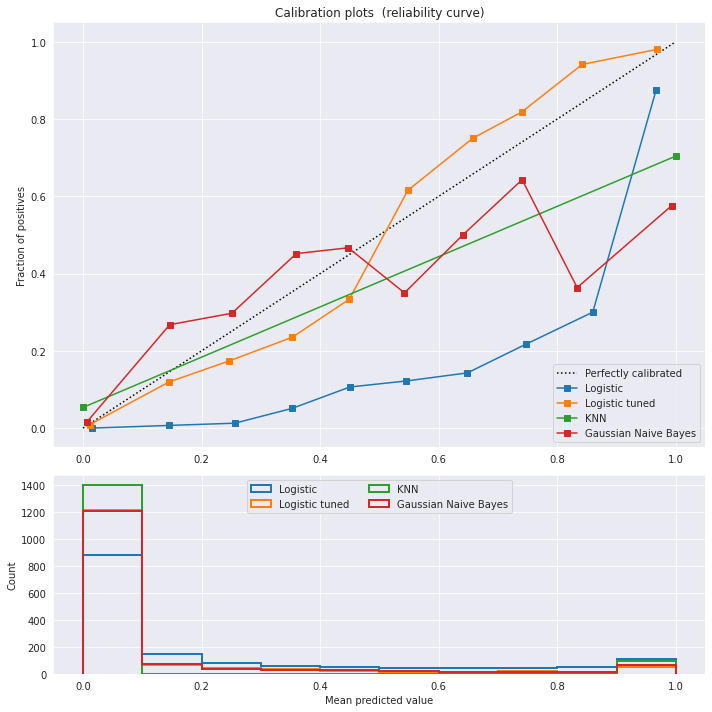

In [109]:
# Plot calibration plots
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(log_reg_ml_wt, 'Logistic'),
                  (log_reg_tuned, 'Logistic tuned'),
                  (knn_tuned, 'KNN'),
                  (gnb_ml, 'Gaussian Naive Bayes')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

# Summary:

In [110]:
model_eval_metrics[['Accuracy','Precision','Recall','F1-Score','ROC AUC', 'Gini Coeff']]

Accuracy  ...  Gini Coeff
Classifier                                          ...            
Logistic Regression Class Weighted           0.889  ...       0.690
Logistic Regression HyperParameter Tuned     0.963  ...       0.704
K-Nearest Neighbors                          0.931  ...       0.458
Gaussian Naive Bayes                         0.907  ...       0.413

[4 rows x 6 columns]

In [111]:
print("Best Performance Model :\n")
model_eval_metrics[['Accuracy','Precision','Recall','F1-Score','ROC AUC', 'Gini Coeff']].idxmax()

Best Performance Model :



Accuracy      Logistic Regression HyperParameter Tuned
Precision     Logistic Regression HyperParameter Tuned
Recall              Logistic Regression Class Weighted
F1-Score      Logistic Regression HyperParameter Tuned
ROC AUC             Logistic Regression Class Weighted
Gini Coeff    Logistic Regression HyperParameter Tuned
dtype: object

1. Based on the Precision vs Recall curve for both the Logistic Regression classifiers, we can see that,

    - Logistic Regression with Class Weights provide better Recall (True Positive Rate) for our imbalanced dataset, however at the expense of poor Precision.
    - **Logistic Regression with Hyperparameter tuned model provides a better Recall (True Positive Rate) at a better Precision level, and is more dependable for validation sets.**
------------------------------------------------------------------------------------------------------------------------------
2. Based on ROC AUC Curve & Gini Co-efficient:
    - Logistic Regression with Class Weights have the higher AUC score of 0.91. 
------------------------------------------------------------------------------------------------------------------------------
3. Based on the Calibration Curve plot between multiple Classifiers, we can observe the following:
    - Logistic Regression classifier plots are more akin to the Perfectly calibrated line. This is mainly because of the way Logistic Regression algorithm classifies - i.e based on calculated probabilities.
    - **Logistic Regression with Hyperparameters tuned is more 'reliable' from the calibration plots** as its plot is closer to the perfect classifier's. 
    - KNN provides a plot that is edging farther away from the perfect calibration line.
    - Gaussian Naive Bayes, performs poorly here compared to other models, mainly because of its inherent assumptions on the independence among predictor variables.
------------------------------------------------------------------------------------------------------------------------------
4. Based on Log Loss:
    - Logistic Regression with Hyperparameters tuned has lesser log-loss than the Class-weighted model, indicating that the former is penalizing more for misclassifications. 

5. Few additional advantages with Logistic Regression model is that it has the probabilities associated with the prediction, which can be used to play with the thresholds and fine-tune our predictions further. 

**Therefore we recommend 'Logistic Regression' classifier for the given dataset.**

                                         ** End of Assignment**